# Previsão de Cancelamento de Clientes do Cartão de Crédito

## 1. Contexto do Negócio

Um gerente do banco identificou um problema crescente: muitos clientes estão encerrando suas contas de cartão de crédito, o que impacta diretamente indicadores-chave como **receita recorrente**, **valor do tempo de vida do cliente (CLV)** e **retorno sobre o custo de aquisição (CAC)**.

O cancelamento (churn) de clientes é especialmente prejudicial neste setor, onde a lucratividade depende de manter um relacionamento duradouro. Antecipar quais clientes têm maior chance de cancelar permite ao banco agir de forma proativa, oferecendo benefícios ou ajustes personalizados que possam impedir o desligamento.

---

## 2. Objetivo do Projeto

Este projeto tem como objetivo construir um modelo preditivo para estimar a **probabilidade de um cliente cancelar o serviço de cartão de crédito**. A proposta é não apenas identificar quem irá cancelar, mas **priorizar os clientes por risco de churn**, permitindo ações de retenção mais direcionadas.

Além disso, a análise exploratória trará **insights relevantes sobre o perfil dos clientes** com maior propensão ao cancelamento, mesmo antes da etapa de modelagem.

---

## 3. Fonte dos Dados

Os dados foram obtidos da plataforma *Kaggle*. O dataset contém **10.127 registros** de clientes de cartão de crédito, com **21 variáveis**, incluindo:

- Dados demográficos
- Relacionamento com o banco
- Informações transacionais e financeiras
- Indicadores derivados

Link para o dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

---

## 4. Variável Alvo

- **Attrition_Flag**: indica se o cliente cancelou o serviço (`1`) ou permanece ativo (`0`).  
  Apenas **16,07%** dos clientes cancelaram, caracterizando um problema de **classificação desbalanceada**.

---

## 5. Principais Variáveis

- **Demográficas**: idade, gênero, dependentes, escolaridade, estado civil, faixa de renda  
- **Relacionamento**: tempo com o banco, número de produtos, inatividade  
- **Comportamentais**: contatos com o banco, valor e quantidade de transações, variações trimestrais  
- **Financeiras**: limite de crédito, saldo rotativo, razão de utiliz

---

## 6. Etapas do Projeto

O projeto seguirá a metodologia **CRISP-DM**, com as seguintes etapas:

1. **Compreensão do problema de negócio**
2. **Entendimento e preparação dos dados**
3. **Análise exploratória (EDA)**
4. **Criação de variáveis derivadas**
5. **Modelagem supervisionada (classificação)**
6. **Avaliação de performance dos modelos**
7. **Interpretação dos resultados e insights**
8. **Recomendações estratégicas para o banco**

---

## 7. Considerações Finais

A previsão de churn é uma ferramenta essencial para aumentar a retenção e a lucratividade dos clientes. Este projeto busca aliar **modelos preditivos eficazes** com **análises interpretáveis** que sirvam de apoio à tomada de decisão por parte do banco.

Nos próximos passos, será realizada a exploração dos dados e o desenvolvimento completo do pipeline de análise e modelagem.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Bank_Churners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [ ]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Dicionário de Dados

| Variável                    | Descrição                                                                                   | Tipo                   |
|----------------------------|---------------------------------------------------------------------------------------------|------------------------|
| `CLIENTNUM`                | Número do cliente. Identificador único para o cliente que possui a conta.                  | Categórica nominal     |
| `Attrition_Flag`           | Variável de evento interno – 1 se a conta foi encerrada, 0 caso contrário.                  | Categórica binária     |
| `Customer_Age`             | Idade do cliente em anos.                                                                   | Numérica discreta      |
| `Gender`                   | Gênero do cliente – M = Masculino, F = Feminino.                                            | Categórica nominal     |
| `Dependent_count`          | Número de dependentes.                                                                      | Numérica discreta      |
| `Education_Level`          | Nível educacional (ex: ensino médio, graduação, etc.).                                      | Categórica ordinal     |
| `Marital_Status`           | Estado civil: Casado, Solteiro, Divorciado, Desconhecido.                                   | Categórica nominal     |
| `Income_Category`          | Categoria de renda anual (<40K, 40K–60K, 60K–80K, 80K–120K, >120K).                         | Categórica ordinal     |
| `Card_Category`            | Tipo de cartão (Blue, Silver, Gold, Platinum).                                              | Categórica ordinal     |
| `Months_on_book`           | Tempo de relacionamento com o banco (em meses).                                             | Numérica discreta      |
| `Total_Relationship_Count`| Número total de produtos que o cliente possui no banco.                                     | Numérica discreta      |
| `Months_Inactive_12_mon`  | Número de meses inativo nos últimos 12 meses.                                               | Numérica discreta      |
| `Contacts_Count_12_mon`   | Número de contatos com o banco nos últimos 12 meses.                                        | Numérica discreta      |
| `Credit_Limit`            | Limite de crédito no cartão.                                                                | Numérica contínua      |
| `Total_Revolving_Bal`     | Saldo rotativo total no cartão de crédito.                                                  | Numérica discreta      |
| `Avg_Open_To_Buy`         | Crédito disponível para compras (média dos últimos 12 meses).                               | Numérica contínua      |
| `Total_Amt_Chng_Q4_Q1`    | Variação no valor transacionado do 1º para o 4º trimestre.                                   | Numérica contínua      |
| `Total_Trans_Amt`         | Valor total transacionado nos últimos 12 meses.                                             | Numérica discreta      |
| `Total_Trans_Ct`          | Número total de transações nos últimos 12 meses.                                            | Numérica discreta      |
| `Total_Ct_Chng_Q4_Q1`     | Variação na contagem de transações do 1º para o 4º trimestre.                                | Numérica contínua      |
| `Avg_Utilization_Ratio`   | Razão média de utilização do cartão.                                                        | Numérica contínua      |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

# Insights já retirados:
### 1. Idade do cliente (`Customer_Age`)
A média de idade é de 46,3 anos. A maioria dos clientes tem entre 41 e 52 anos. A faixa etária varia de 26 a 73 anos.
Uma hipótese interessante é verificar se clientes mais jovens tendem a cancelar o serviço com maior frequência.

### 2. Número de dependentes (`Dependent_count`)
O número de dependentes varia entre 0 e 5. A mediana é 2.
Pode ser relevante investigar se clientes com mais dependentes tendem a ser mais fiéis ou se enfrentam dificuldades financeiras que levam ao cancelamento.

### 3. Tempo de relacionamento com o banco (`Months_on_book`)
Os clientes estão em média há 36 meses (3 anos) com o banco, e no máximo 56 meses (aproximadamente 4,5 anos).
É possível explorar se o cancelamento acontece com maior frequência entre clientes novos ou antigos.

### 4. Número total de produtos no banco (`Total_Relationship_Count`)
Os clientes possuem de 1 a 6 produtos. A mediana é 4.
É razoável supor que quanto mais produtos o cliente possui, menor a chance de cancelamento.

### 5. Meses inativos nos últimos 12 meses (`Months_Inactive_12_mon`)
A média é de 2,34 meses inativos por ano. Há casos de até 6 meses de inatividade.
Esse é um sinal de risco e pode estar diretamente relacionado ao cancelamento do serviço.
75% dos clientes ficaram pelo menos 2 meses inativos nos últimos 12 meses. Isso é um indicador ruim. O banco deve planejar estratégias para melhorar o consumo dos seus clientes.

### 6. Número de contatos com o banco (`Contacts_Count_12_mon`)
A média é de 2,45 contatos por ano. Alguns clientes entram em contato frequentemente, enquanto outros não entram em contato nenhum.
Tanto o excesso quanto a ausência de contato podem indicar insatisfação ou desinteresse.
75% dos clientes entraram em contato com o banco pelo menos 2 vezes nos últimos 12 meses. Isso também é negativo, algo no produto do cartão de crédito está levando os clientes a procurarem a empresa, provavelmente por insatisfação.

### 7. Limite de crédito (`Credit_Limit`)
O limite de crédito médio é de 8.631, variando entre 1.438 e 34.516.
Clientes com limites mais altos podem ter maior valor de tempo de vida (CLV) e merecem atenção especial.

### 8. Saldo rotativo (`Total_Revolving_Bal`)
A média é de R$ 1.162. Muitos clientes têm saldo rotativo igual a zero.
Esse comportamento pode significar controle financeiro ou falta de uso do cartão.

### 9. Crédito disponível para compras (`Avg_Open_To_Buy`)
A média de crédito disponível é de R$ 7.469. Existe forte correlação esperada com o limite de crédito.
É possível derivar uma nova variável: razão de utilização = 1 - (crédito disponível / limite).

### 10. Variação no valor transacionado entre trimestres (`Total_Amt_Chng_Q4_Q1`)
A média da variação no valor das transações é de 0,76. O máximo chega a 3,39.
A variação pode indicar mudança significativa no comportamento do cliente, seja por insatisfação ou mudança de uso.

### 11. Valor e quantidade de transações (`Total_Trans_Amt e Total_Trans_Ct`)
A média de valor transacionado é de R$ 4.400 e a média de quantidade de transações é 65 por ano.
Isso representa aproximadamente 5,4 transações por mês, o que é um número baixo. Pode indicar clientes de baixo engajamento ou pouco uso do cartão.

### 12. Variação na quantidade de transações entre trimestres (`Total_Ct_Chng_Q4_Q1`)
A média da variação na contagem de transações é de 0,71.
Essa variável, combinada com o valor transacionado, ajuda a distinguir entre mudanças no volume e na frequência de uso.

### 13. Razão média de utilização do cartão (`Avg_Utilization_Ratio`)
A média de utilização é de 27%. O valor máximo chega a 100%.
Valores altos podem indicar clientes mais endividados ou com maior propensão a cancelamento.

In [ ]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
df['Utilizacao_Relativa'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
df['Engajamento'] = df['Contacts_Count_12_mon'] / df['Months_on_book']
df['Delta_Uso'] = df['Total_Ct_Chng_Q4_Q1'] * df['Total_Trans_Ct']

colunas_desejadas = ['Utilizacao_Relativa', 'Engajamento', 'Delta_Uso']
print(df[colunas_desejadas])

       Utilizacao_Relativa  Engajamento  Delta_Uso
0                 0.061224     0.076923     68.250
1                 0.104651     0.045455    122.562
2                 0.000000     0.000000     46.660
3                 0.759734     0.029412     46.660
4                 0.000000     0.000000     70.000
...                    ...          ...        ...
10122             0.462403     0.075000    100.269
10123             0.511106     0.120000     47.127
10124             0.000000     0.111111     49.080
10125             0.000000     0.083333     44.764
10126             0.188776     0.160000     39.589

[10127 rows x 3 columns]


# Interpretação das Variáveis Derivadas

## 1. `Utilizacao_Relativa`
- **Cálculo:**  
  `Utilizacao_Relativa = Total_Revolving_Bal / Credit_Limit`

- **Descrição:**  
  Indica quanto do limite de crédito o cliente está utilizando.

- **Interpretação:**
  - Valores próximos de **0** → pouco uso (ou nenhuma dívida rotativa).
  - Valores altos (**> 0.5**) → uso intensivo do limite, podendo representar **maior risco** ou **maior engajamento**.

- **Exemplos:**
  - **Cliente 3:** `0.75` → uso intensivo do limite.
  - **Clientes 2 e 4:** `0.0` → sem uso do saldo rotativo.

---

## 2. `Engajamento`
- **Cálculo:**  
  `Engajamento = Contacts_Count_12_mon / Months_on_book`

- **Descrição:**  
  Mede a **frequência de contato com o banco** ao longo do tempo.

- **Interpretação:**
  - Alta frequência → cliente **engajado** ou **insatisfeito**.
  - Frequência nula → cliente **ausente** ou **desinteressado**.

- **Exemplos:**
  - **Cliente 0:** `0.077` → contato médio de 1 vez a cada 13 meses.
  - **Clientes 2 e 4:** `0.0` → **zero contato com o banco** (potencial sinal de churn ou desinteresse).

---

## 3. `Delta_Uso`
- **Cálculo:**  
  `Delta_Uso = Total_Ct_Chng_Q4_Q1 × Total_Trans_Ct`

- **Descrição:**  
  Mede o **volume de transações** ponderado pela **variação trimestral**.

- **Interpretação:**
  - Valores altos → aumento recente ou alto volume de transações.
  - Valores baixos → pouco uso ou pouca variação.

- **Exemplos:**
  - **Cliente 1:** `122.562` → grande volume e/ou aumento recente nas transações.
  - **Clientes 2 e 3:** `46.660` → uso moderado com pouca variação.


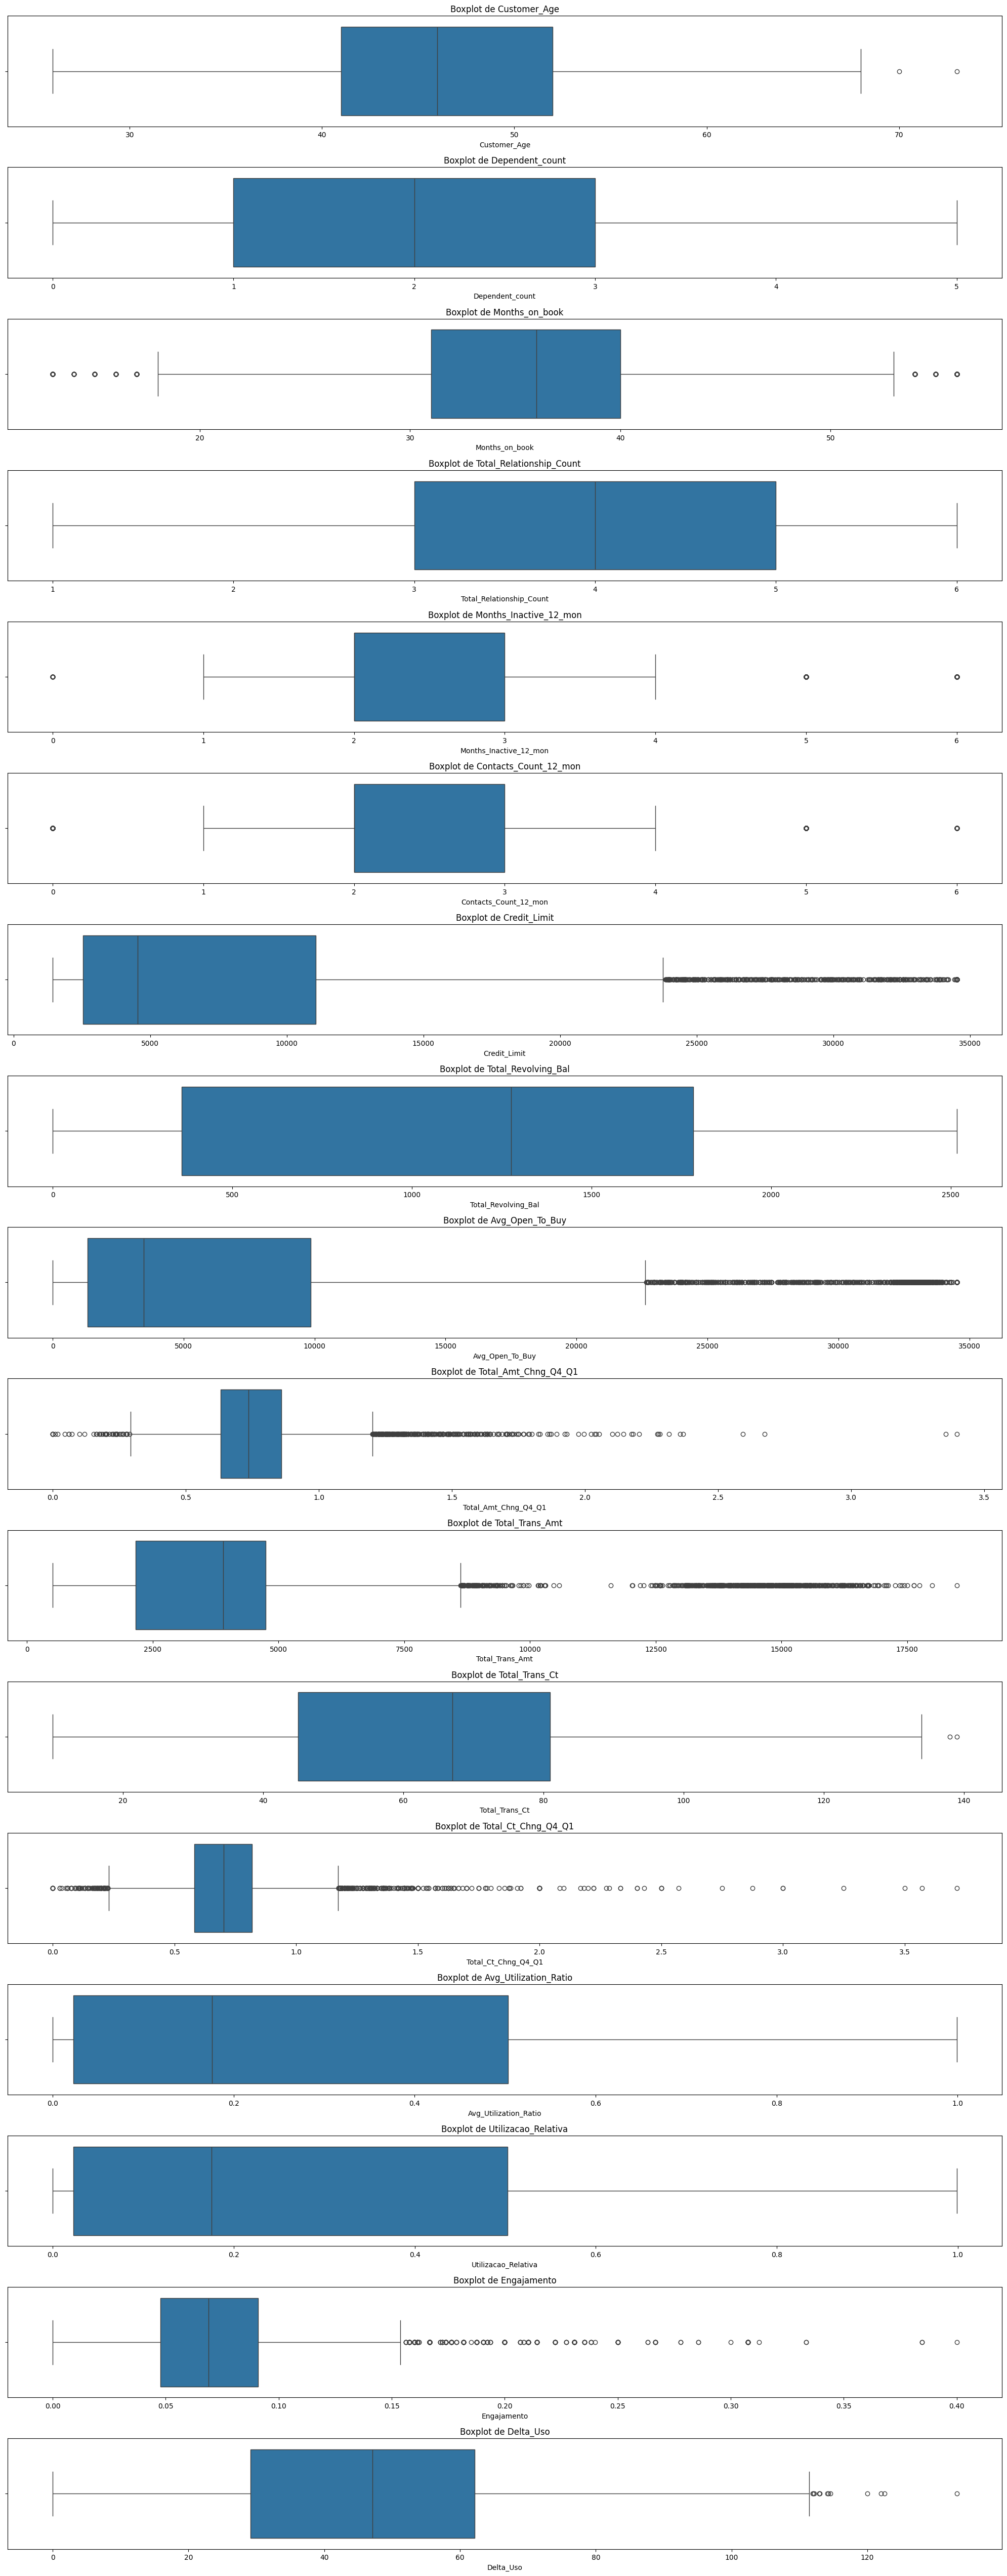

In [ ]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_numericas = colunas_numericas.drop(['CLIENTNUM'], errors='ignore')

plt.figure(figsize=(20, len(colunas_numericas) * 3))
for i, col in enumerate(colunas_numericas):
    plt.subplot(len(colunas_numericas), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=12)
    plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['CLIENTNUM'], inplace=True)

df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

df['gender'] = df['gender'].map({'F': 1, 'M': 0})
df['churn_flag'] = df['churn_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

### Últimas alterações
1) Removi a variável `CLIENTNUM` porque ela possui um valor único para cada registro, não sendo útil para a análise.

2) Também troquei o nome das colunas para um formato padrão a fim de facilitar a manipulação dos dados. Além disso, a variável `Attrition_Flag` foi renomeada para `churn_flag` para facilitar a interpretação.

3) As variáveis `Gender` e `Attrition_Flag` foram expressas como binárias. Isso tornará a análise exploratória mais fácil, como na visualização de valores percentuais.

---

### Divisão de dados para EDA
1) Dividir os dados em treino e teste. Para usar o conjunto de treino na EDA, a fim de evitar o vazamento de dados e obter uma representação realista e avaliar o modelo corretamente com dados desconhecidos. Especificarei o parâmetro `stratify=y` na função `train_test_split` para garantir que o processo de divisão mantenha o mesmo percentual de cada classe-alvo nos conjuntos de treino e teste.
Isso é particularmente útil ao lidar com conjuntos de dados desbalanceados, como é o caso aqui, já que há mais clientes existentes do que clientes que cancelaram.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='churn_flag')
y = df['churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('distribuição de conjunto de treino:')
print(y_train.value_counts(normalize=True))
print('distribuição no conjunto de teste:')
print(y_test.value_counts(normalize=True))

distribuição de conjunto de treino:
churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64
distribuição no conjunto de teste:
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


# Análise Exploratória dos Dados

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

customer_age  gender  dependent_count education_level marital_status  \
2856            36       1                0         Unknown        Married   
6515            44       0                3     High School         Single   
7141            46       0                2     High School        Married   
632             36       1                2        Graduate        Married   
3496            50       0                1        Graduate         Single   

     income_category card_category  months_on_book  total_relationship_count  \
2856  Less than $40K          Blue              24                         4   
6515     $60K - $80K        Silver              36                         5   
7141    $80K - $120K          Blue              30                         6   
632   Less than $40K          Blue              24                         3   
3496         $120K +          Blue              40                         4   

      months_inactive_12_mon  ...  avg_open_to_buy  total_amt_chng_q4_q1  \
2856                       3  ...            340.0                 0.686   
6515                       2  ...          25276.0                 0.849   
7141                       3  ...          10755.0                 0.892   
632                        1  ...           1531.0                 0.869   
3496                       2  ...          33331.0                 0.725   

      total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
2856             1755              42                0.448   
6515             2282              38                0.583   
7141             4277              89                0.854   
632              1652              41                0.367   
3496             3874              72                0.714   

      avg_utilization_ratio  utilizacao_relativa  engajamento  delta_uso  \
2856                  0.868             0.867704     0.083333     18.816   
6515                  0.000             0.000000     0.083333     22.154   
7141                  0.078             0.078406     0.033333     76.006   
632                   0.510             0.509923     0.125000     15.047   
3496                  0.034             0.034332     0.075000     51.408   

      churn_flag  
2856           0  
6515           1  
7141           0  
632            0  
3496           0  

[5 rows x 23 columns]

In [ ]:
print(f"Dimensão do conjunto de treino: {train.shape[0]} linhas e {train.shape[1]} colunas")

Dimensão do conjunto de treino: 8101 linhas e 23 colunas


In [ ]:
num_vars = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_vars = train.select_dtypes(include='object').columns.tolist()

print(f"\nVariáveis numéricas ({len(num_vars)}):\n{num_vars}")
print(f"\nVariáveis categóricas ({len(cat_vars)}):\n{cat_vars}")


Variáveis numéricas (19):
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'utilizacao_relativa', 'engajamento', 'delta_uso', 'churn_flag']

Variáveis categóricas (4):
['education_level', 'marital_status', 'income_category', 'card_category']


In [ ]:
print('\nDistribuição da variável-alvo (churn_flag):')
churn_dist = train['churn_flag'].value_counts(normalize=True).rename_axis('Churn').reset_index(name='proporção')
display(churn_dist)


Distribuição da variável-alvo (churn_flag):


Churn  proporção
0      0   0.839279
1      1   0.160721

/tmp/ipython-input-2558681743.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Cancelou', 'Cancelou'])


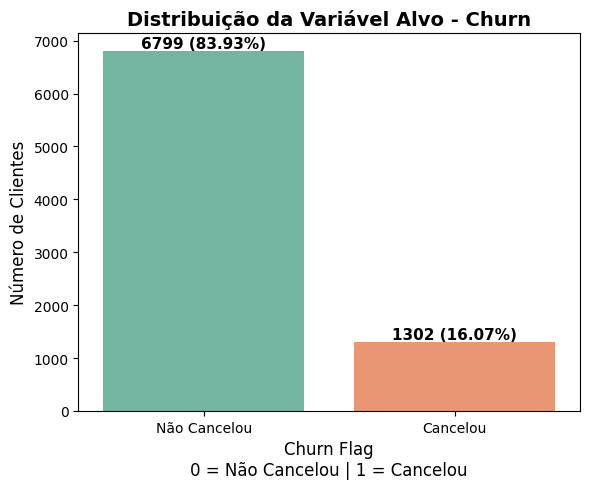

In [ ]:
churn_counts = train['churn_flag'].value_counts()
churn_percent = train['churn_flag'].value_counts(normalize=True) * 100

churn_df = pd.DataFrame({
    'Churn': churn_counts.index,
    'Count': churn_counts.values,
    'Percent': churn_percent.values
})

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=train, x='churn_flag', hue='churn_flag', palette='Set2', legend=False)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    label = f"{churn_df.loc[i, 'Count']} ({churn_df.loc[i, 'Percent']:.2f}%)"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribuição da Variável Alvo - Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Flag\n0 = Não Cancelou | 1 = Cancelou', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.set_xticklabels(['Não Cancelou', 'Cancelou'])

plt.tight_layout()
plt.show()

/tmp/ipython-input-3279901966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, order=order, palette='Set2')


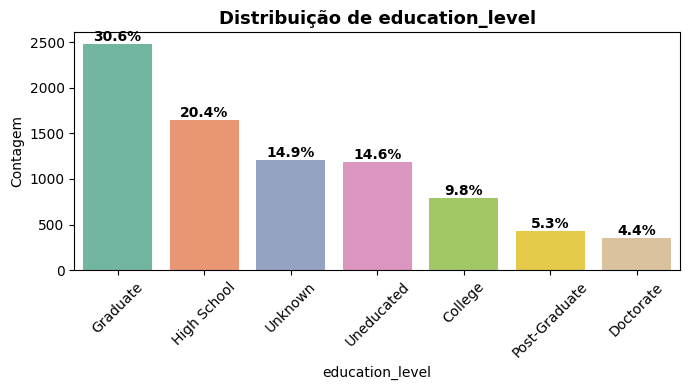

/tmp/ipython-input-3279901966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, order=order, palette='Set2')


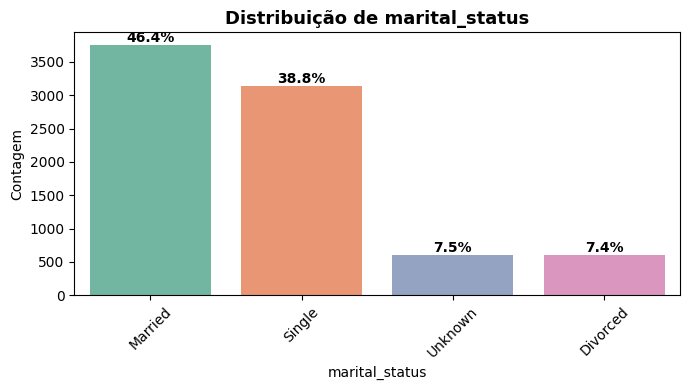

/tmp/ipython-input-3279901966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, order=order, palette='Set2')


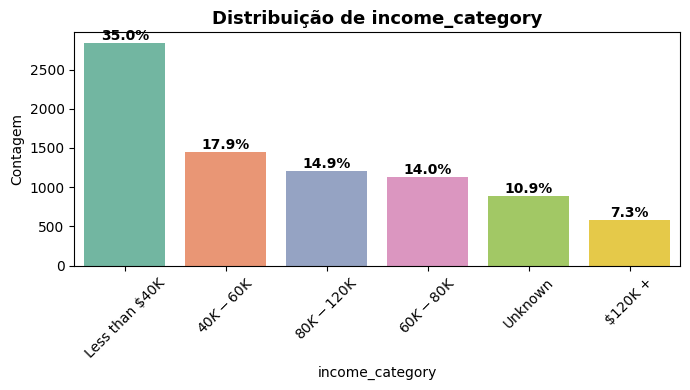

/tmp/ipython-input-3279901966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=feature, order=order, palette='Set2')


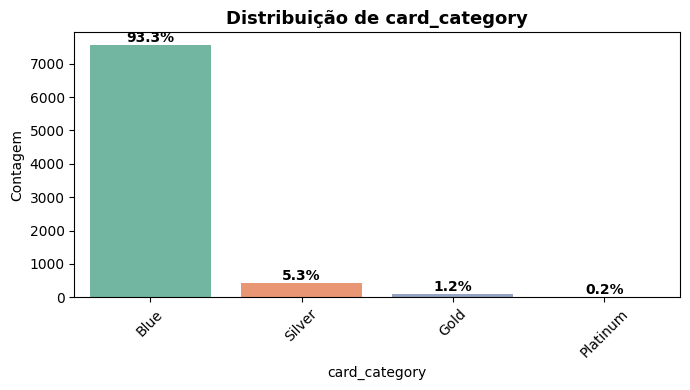

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista com suas variáveis categóricas
categorical_features = ['education_level', 'marital_status', 'income_category', 'card_category']

# Loop para gerar os gráficos
for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    order = train[feature].value_counts().index  # ordena pelas categorias mais frequentes
    sns.countplot(data=train, x=feature, order=order, palette='Set2')

    # Adiciona rótulos com porcentagem acima de cada barra
    total = len(train)
    for p in plt.gca().patches:
        count = p.get_height()
        percent = 100 * count / total
        plt.gca().annotate(f'{percent:.1f}%',
                           (p.get_x() + p.get_width() / 2., count),
                           ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.title(f'Distribuição de {feature}', fontsize=13, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


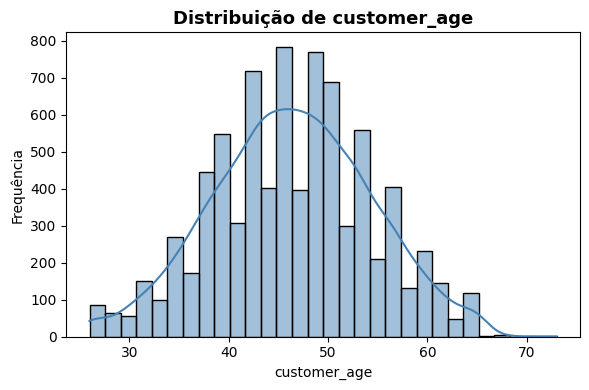

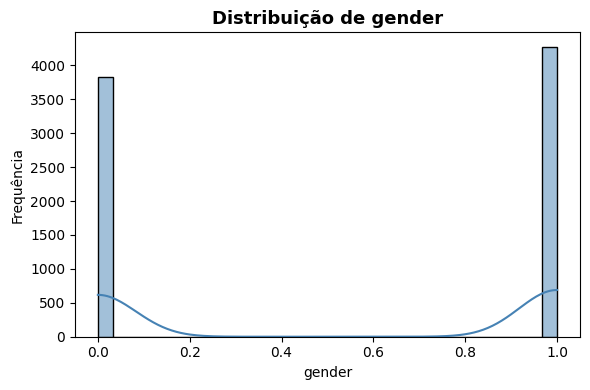

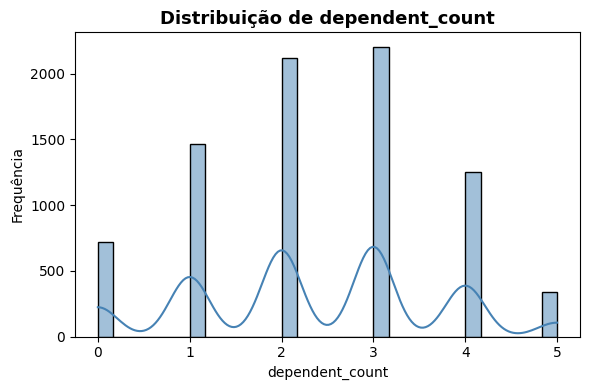

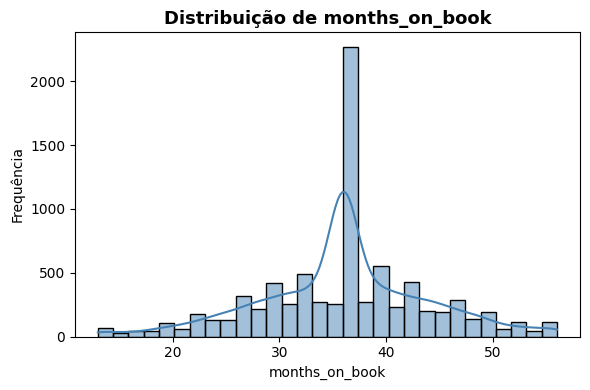

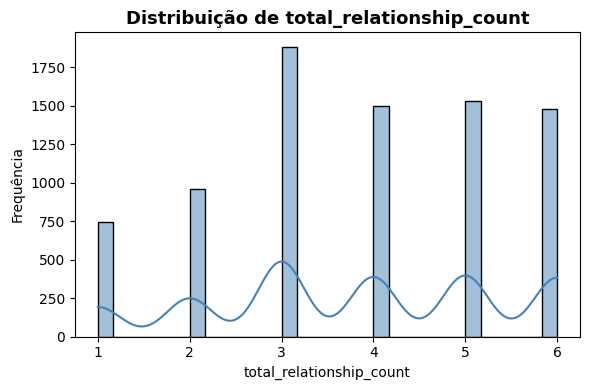

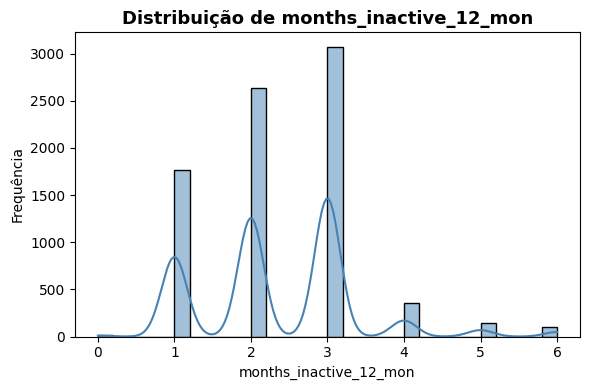

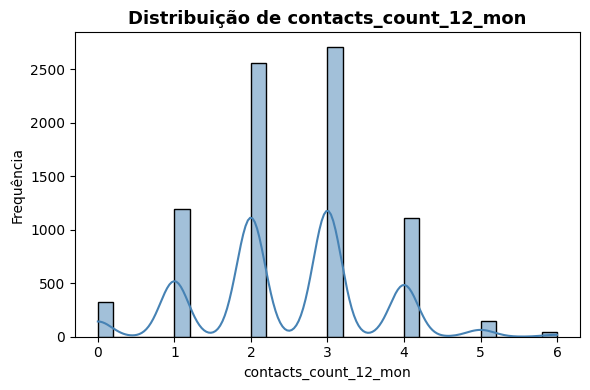

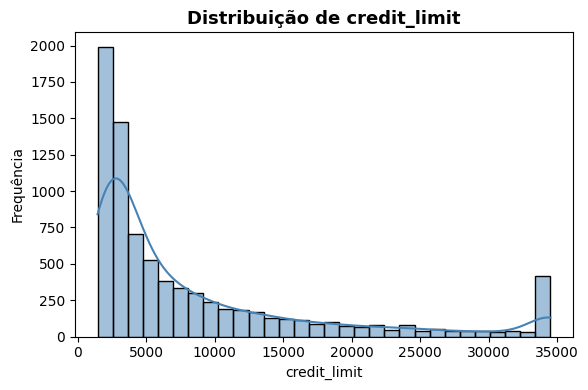

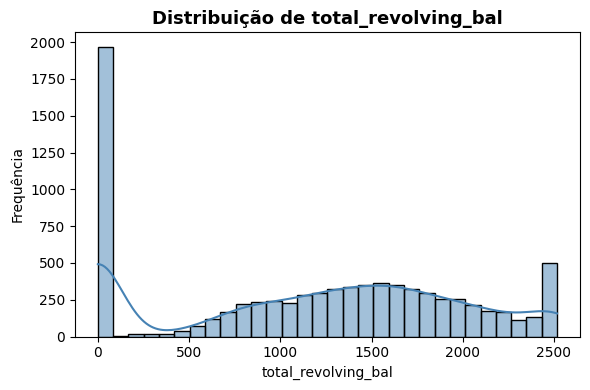

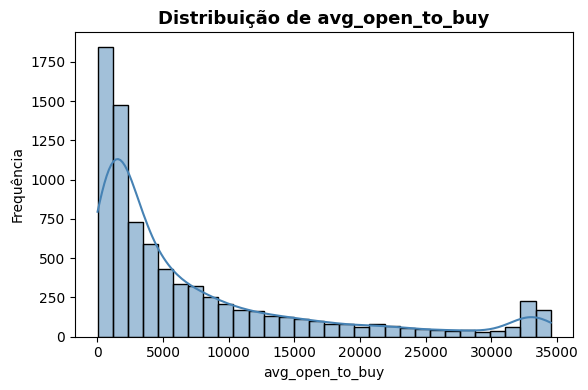

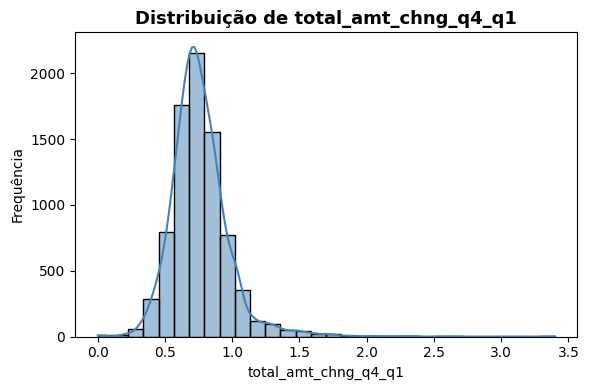

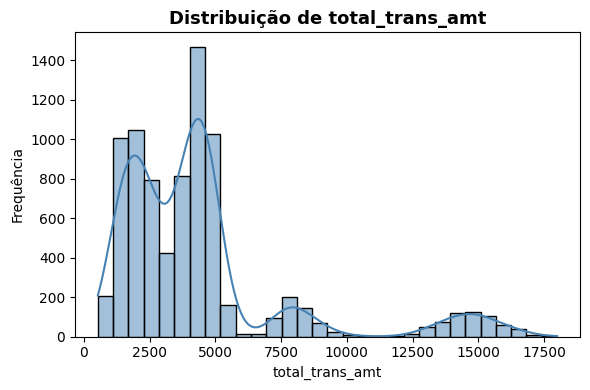

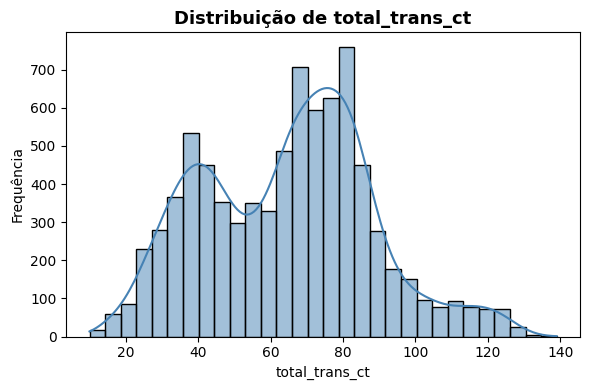

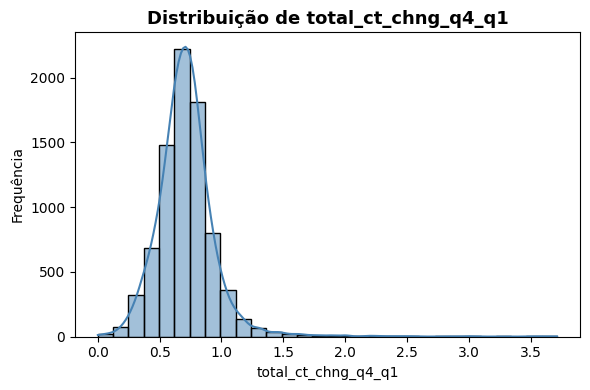

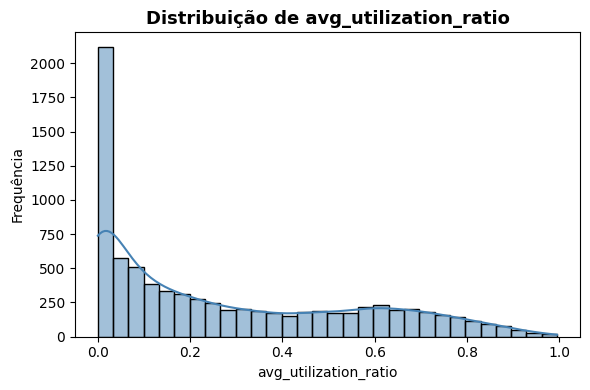

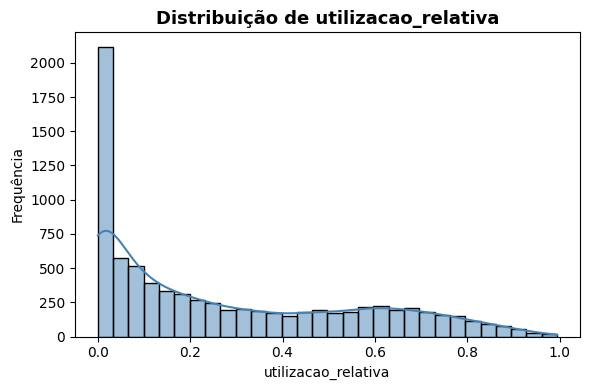

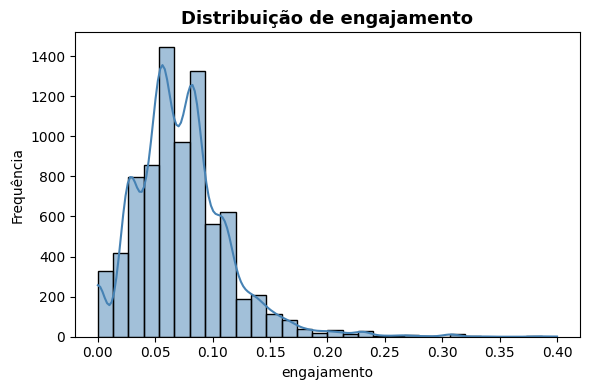

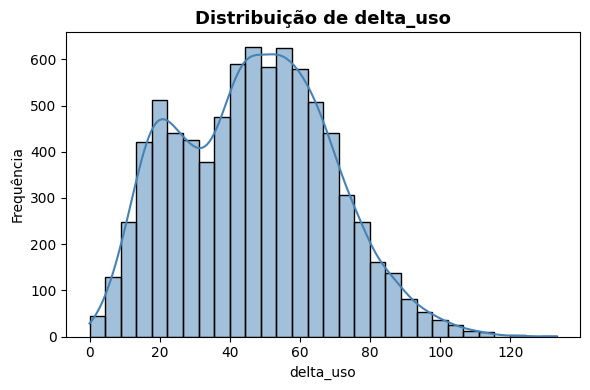

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona colunas numéricas, exceto a variável alvo
num_features = train.select_dtypes(include=['int64', 'float64']).drop(columns='churn_flag').columns

# Loop para criar histograma + KDE (curva de densidade)
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train, x=feature, kde=True, bins=30, color='steelblue')
    plt.title(f'Distribuição de {feature}', fontsize=13, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


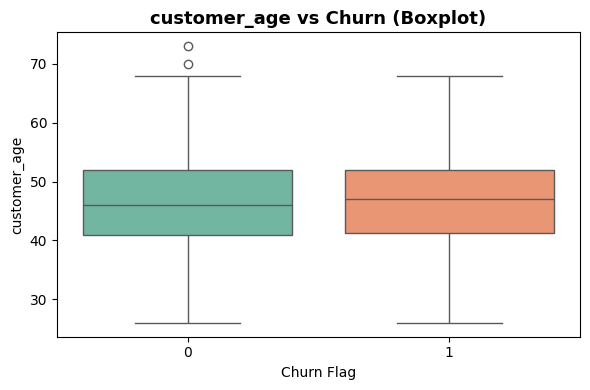

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


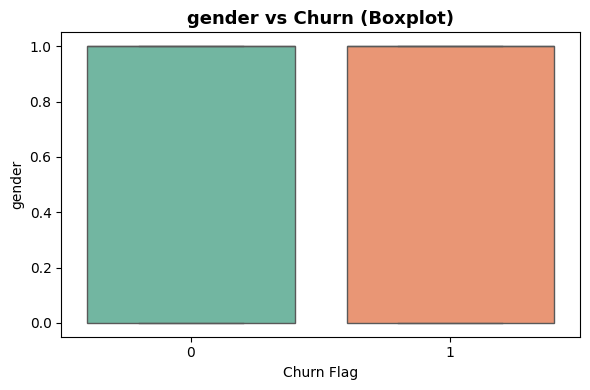

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


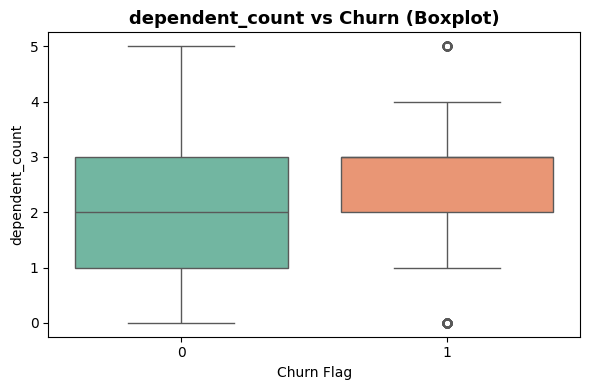

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


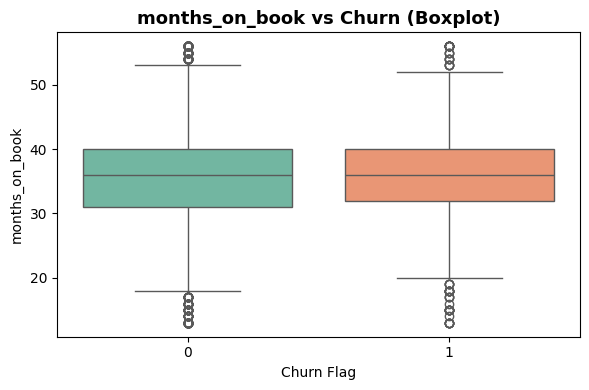

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


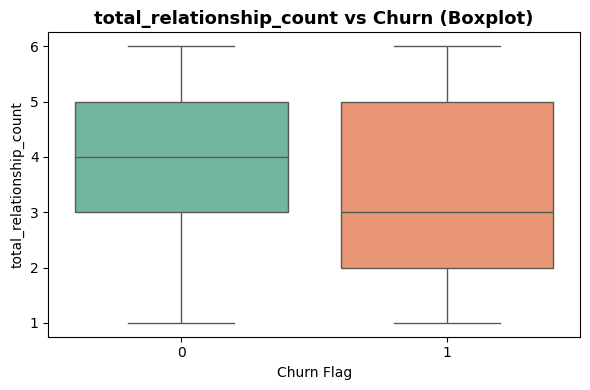

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


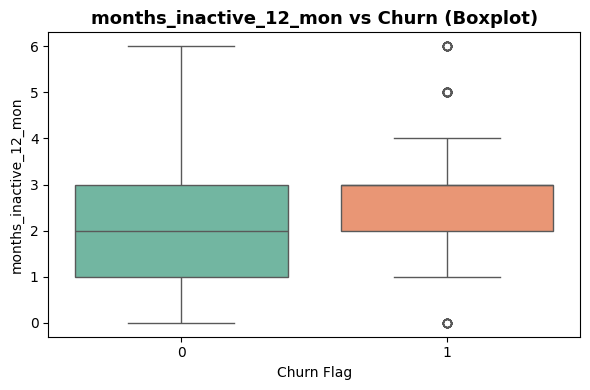

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


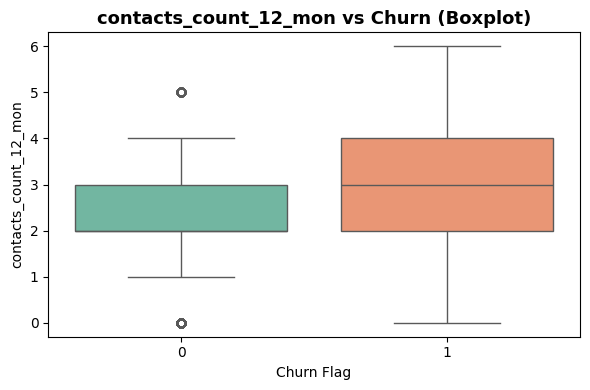

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


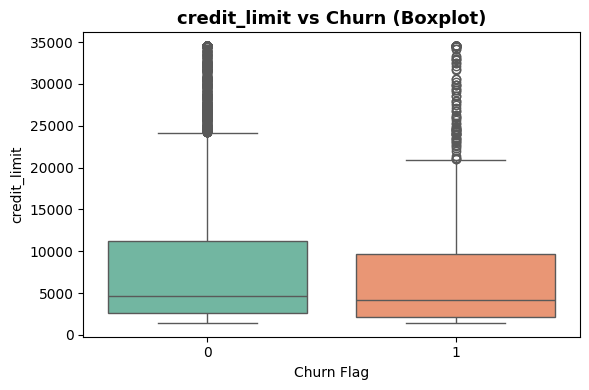

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


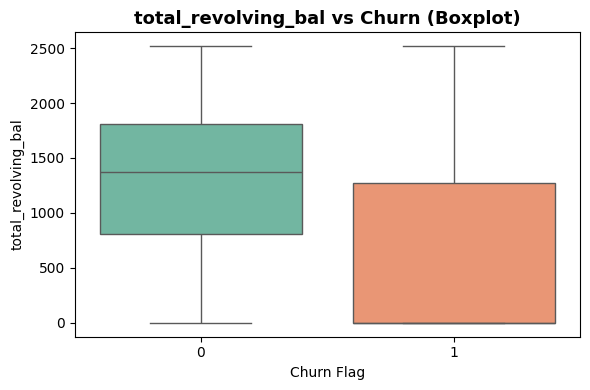

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


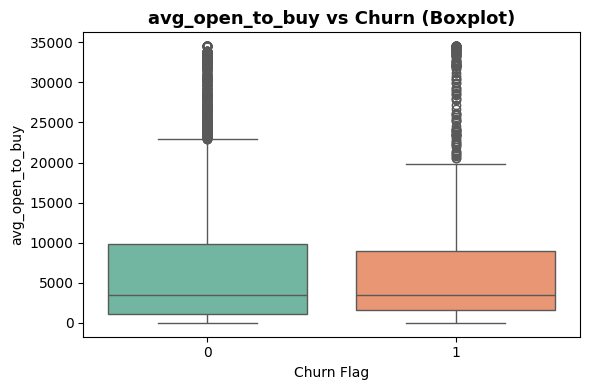

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


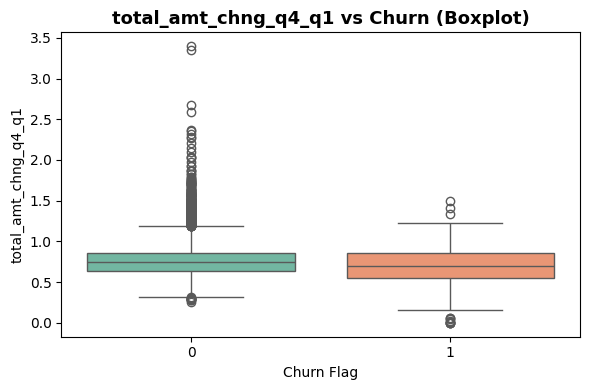

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


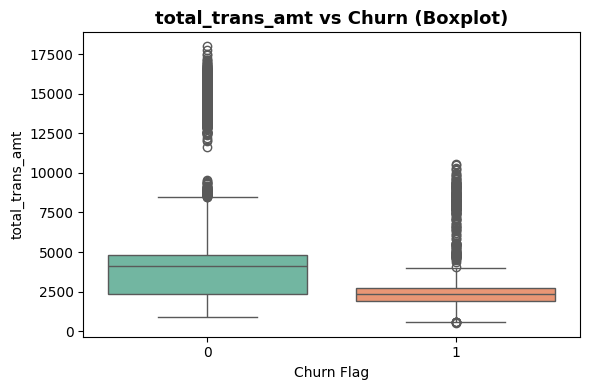

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


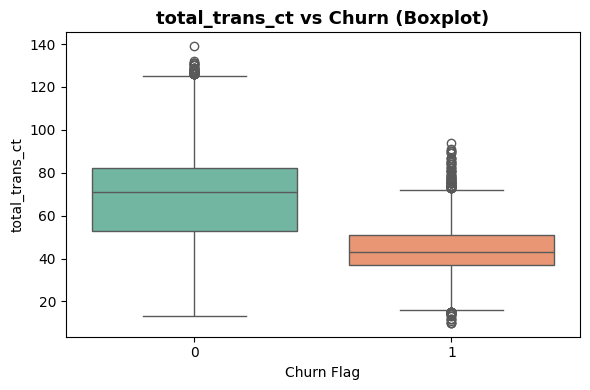

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


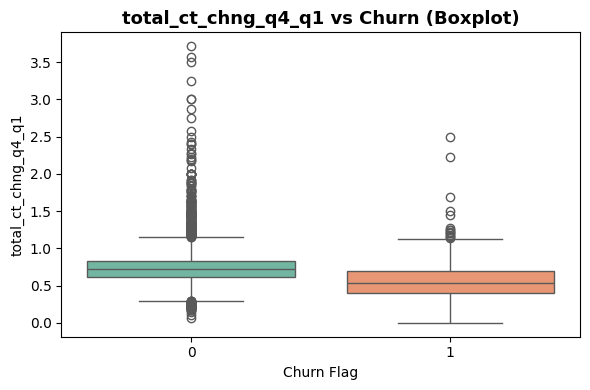

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


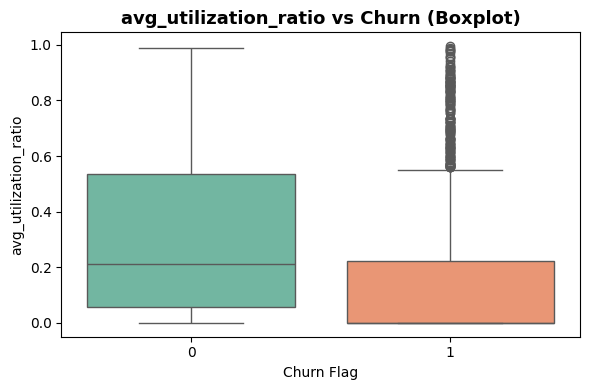

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


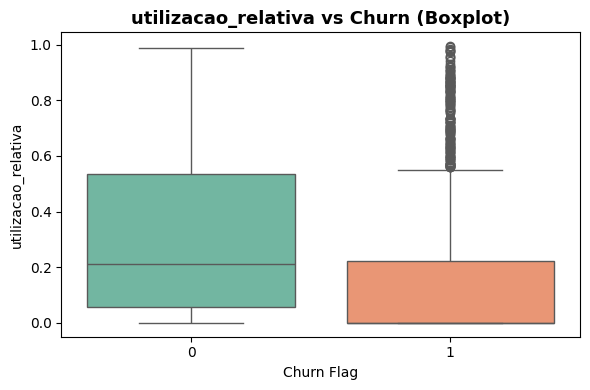

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


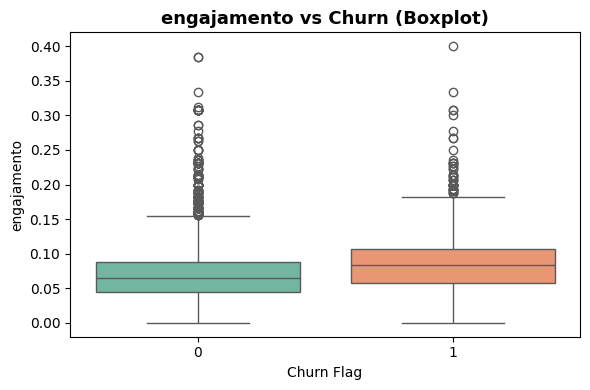

/tmp/ipython-input-1642787389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')


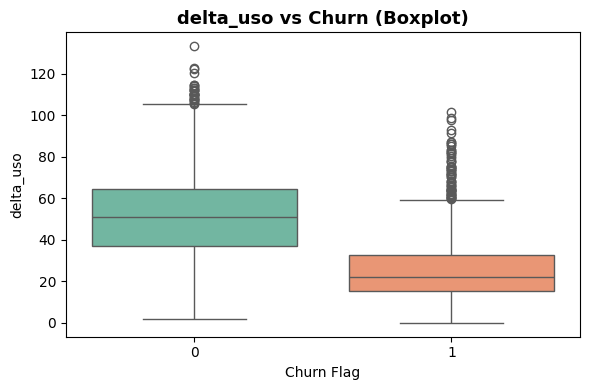

In [ ]:
num_features = train.select_dtypes(include=['int64', 'float64']).drop(columns='churn_flag').columns

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x='churn_flag', y=feature, palette='Set2')
    plt.title(f'{feature} vs Churn (Boxplot)', fontsize=13, fontweight='bold')
    plt.xlabel('Churn Flag')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [ ]:
mean_by_churn = train.groupby('churn_flag')[num_features].mean().T
display(mean_by_churn.style.format("{:.2f}").set_caption("Média das Variáveis Numéricas por Classe de Churn"))


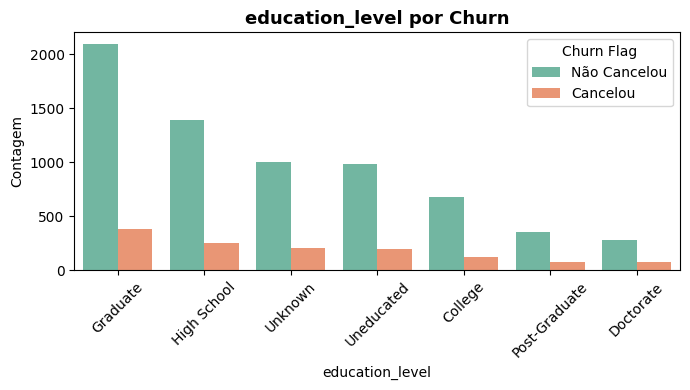

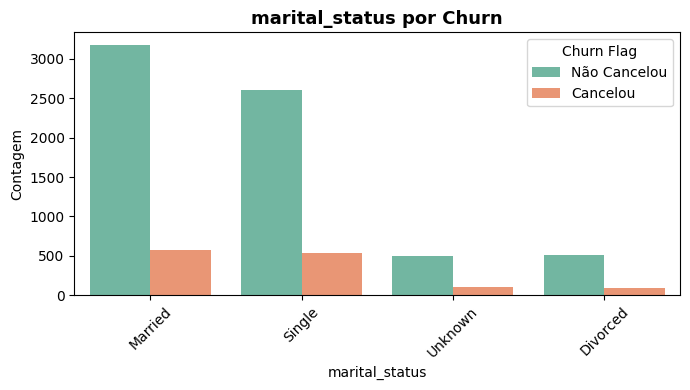

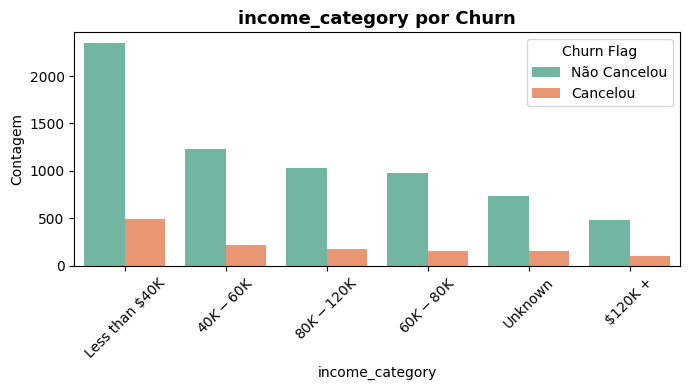

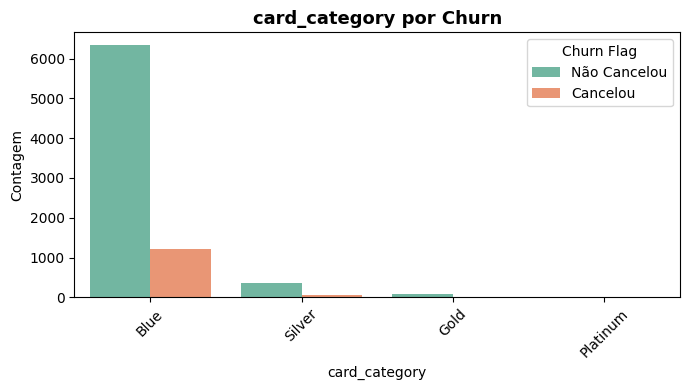

In [ ]:
cat_features = train.select_dtypes(include='object').columns

for feature in cat_features:
    plt.figure(figsize=(7, 4))
    order = train[feature].value_counts().index
    sns.countplot(data=train, x=feature, hue='churn_flag', order=order, palette='Set2')

    plt.title(f'{feature} por Churn', fontsize=13, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(title='Churn Flag', labels=['Não Cancelou', 'Cancelou'])
    plt.tight_layout()
    plt.show()


In [ ]:
for feature in cat_features:
    print(f'\n{feature} - Distribuição de churn (%) por categoria:')
    crosstab = pd.crosstab(train[feature], train['churn_flag'], normalize='index') * 100
    display(crosstab.style.format("{:.2f}%"))



education_level - Distribuição de churn (%) por categoria:



marital_status - Distribuição de churn (%) por categoria:



income_category - Distribuição de churn (%) por categoria:



card_category - Distribuição de churn (%) por categoria:


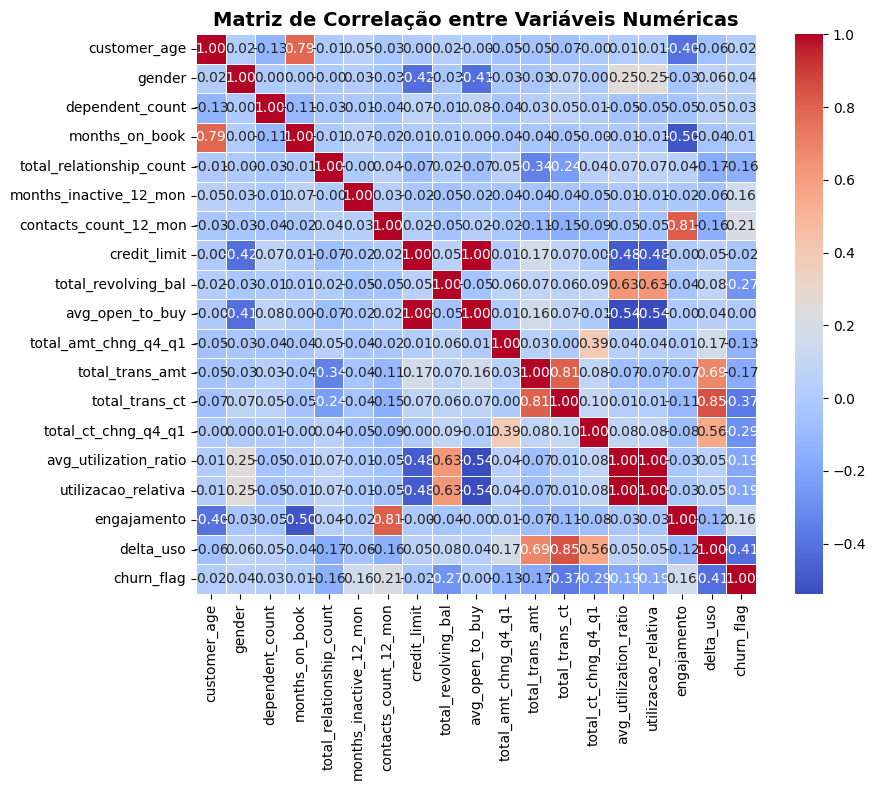

In [ ]:
plt.figure(figsize=(10, 8))
corr = train.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


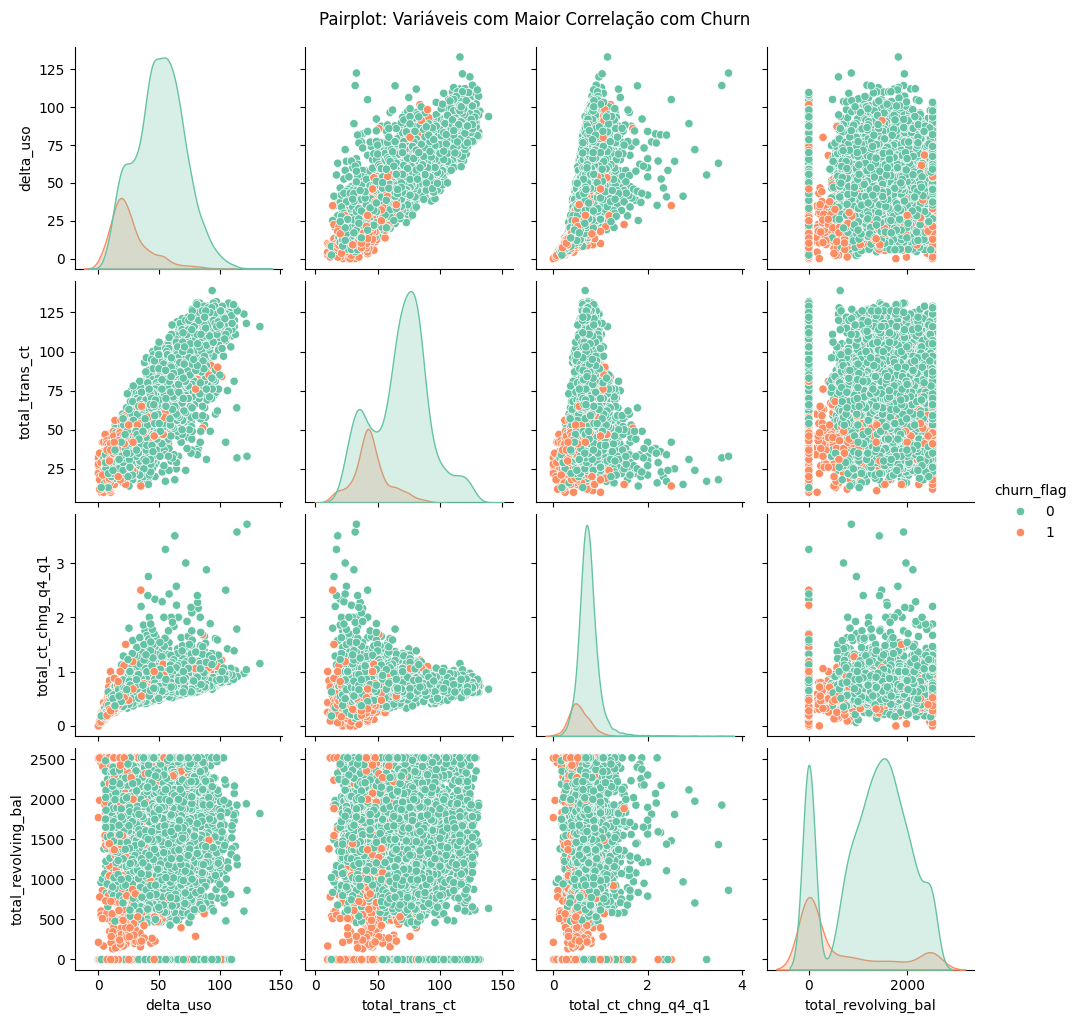

In [ ]:
correlation_with_target = corr['churn_flag'].drop('churn_flag').abs().sort_values(ascending=False)

top_corr_features = correlation_with_target.head(4).index.tolist()

pairplot_features = top_corr_features + ['churn_flag']

sns.pairplot(train[pairplot_features], hue='churn_flag', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot: Variáveis com Maior Correlação com Churn", y=1.02)
plt.show()


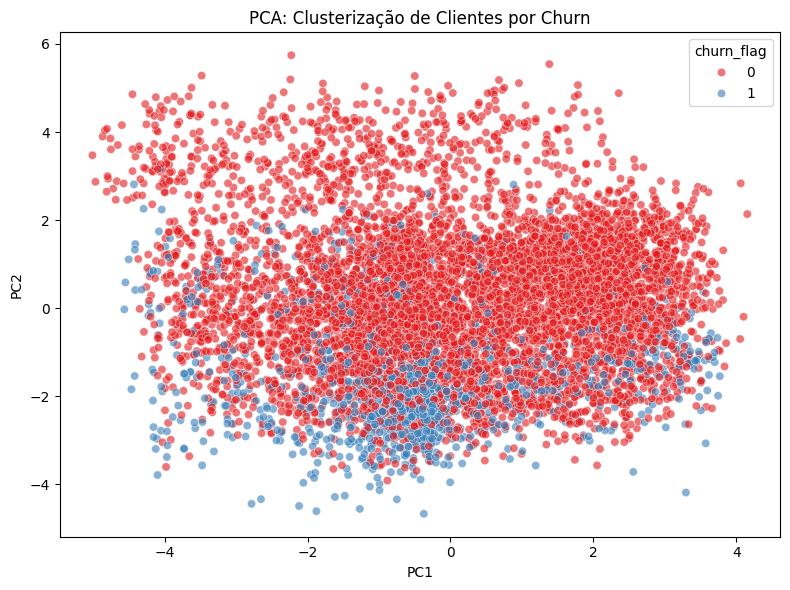

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = train.select_dtypes(include=['int64', 'float64']).drop(columns='churn_flag')
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['churn_flag'] = train['churn_flag'].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='churn_flag', palette='Set1', alpha=0.6)
plt.title('PCA: Clusterização de Clientes por Churn')
plt.tight_layout()
plt.show()


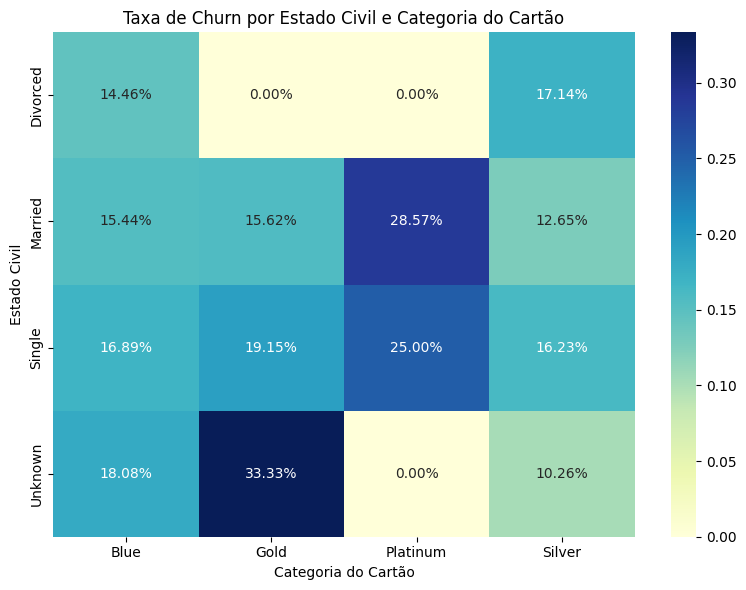

In [ ]:
heatmap_data = pd.crosstab(train['marital_status'], train['card_category'], values=train['churn_flag'], aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap='YlGnBu')
plt.title("Taxa de Churn por Estado Civil e Categoria do Cartão")
plt.ylabel("Estado Civil")
plt.xlabel("Categoria do Cartão")
plt.tight_layout()
plt.show()


/tmp/ipython-input-69422660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_churn = train.groupby('faixa_idade')['churn_flag'].mean().reset_index()
/tmp/ipython-input-69422660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=idade_churn, x='faixa_idade', y='churn_flag', palette='viridis')


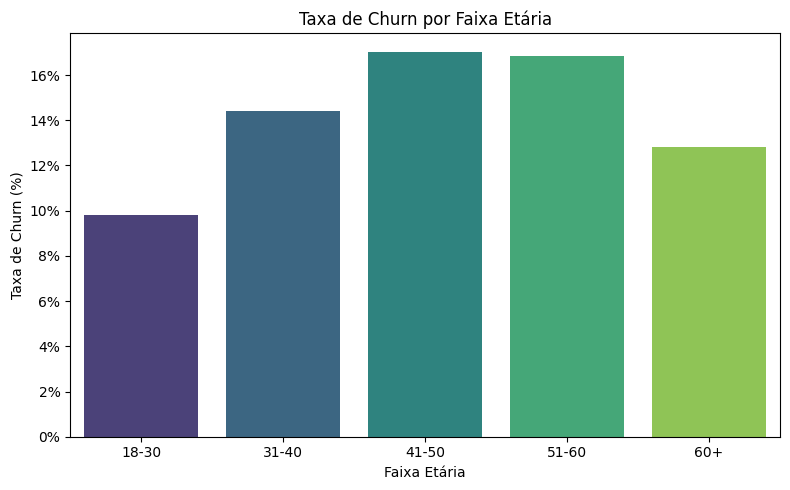

In [ ]:
train['faixa_idade'] = pd.cut(train['customer_age'], bins=[18, 30, 40, 50, 60, 100],
                              labels=['18-30', '31-40', '41-50', '51-60', '60+'])

idade_churn = train.groupby('faixa_idade')['churn_flag'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=idade_churn, x='faixa_idade', y='churn_flag', palette='viridis')
plt.title("Taxa de Churn por Faixa Etária")
plt.ylabel("Taxa de Churn (%)")
plt.xlabel("Faixa Etária")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


/tmp/ipython-input-3953893656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=card_churn.index, y=card_churn.values, palette="flare")


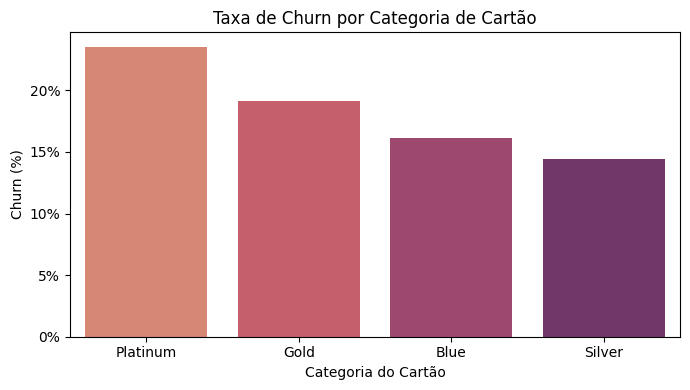

In [ ]:
card_churn = train.groupby('card_category')['churn_flag'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x=card_churn.index, y=card_churn.values, palette="flare")
plt.title("Taxa de Churn por Categoria de Cartão")
plt.ylabel("Churn (%)")
plt.xlabel("Categoria do Cartão")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


/tmp/ipython-input-281567134.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=saldo_stats, x='churn_flag', y='avg_open_to_buy', palette="Set2")


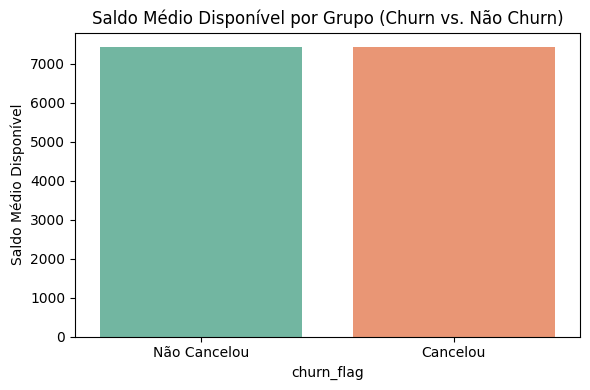

In [ ]:
saldo_stats = train.groupby('churn_flag')['avg_open_to_buy'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=saldo_stats, x='churn_flag', y='avg_open_to_buy', palette="Set2")
plt.title("Saldo Médio Disponível por Grupo (Churn vs. Não Churn)")
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.ylabel("Saldo Médio Disponível")
plt.tight_layout()
plt.show()


In [ ]:
correlations = train.corr(numeric_only=True)['churn_flag'].drop('churn_flag').sort_values(key=abs, ascending=False)

print("Top variáveis mais correlacionadas com churn:")
print(correlations.head(5).apply(lambda x: f"{x:.2f}"))


Top variáveis mais correlacionadas com churn:
delta_uso                -0.41
total_trans_ct           -0.37
total_ct_chng_q4_q1      -0.29
total_revolving_bal      -0.27
contacts_count_12_mon     0.21
Name: churn_flag, dtype: object


/tmp/ipython-input-3614568569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y='delta_uso', palette='Set2')


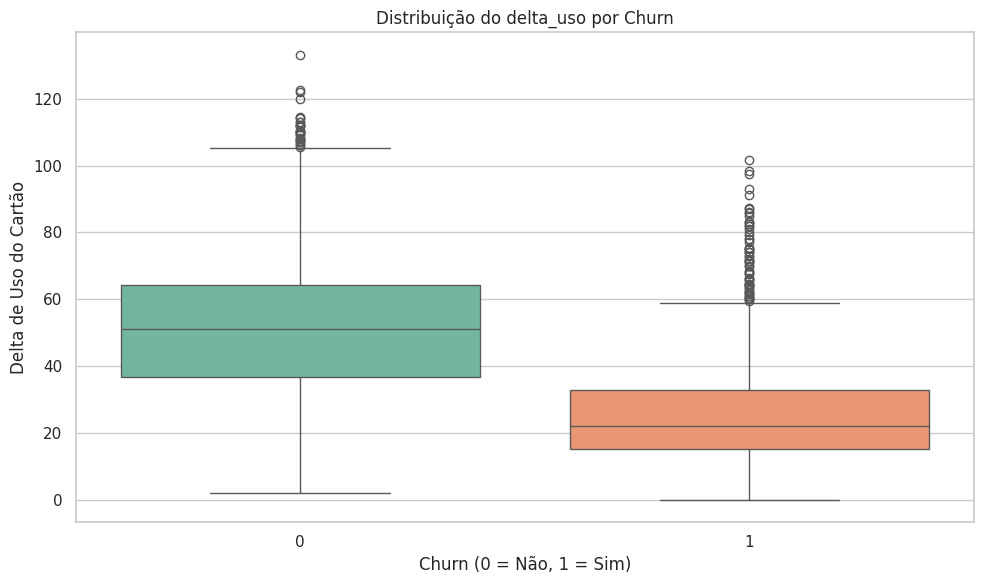

/tmp/ipython-input-3614568569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='churn_flag', y='total_trans_ct', palette='Set2', inner="quartile")


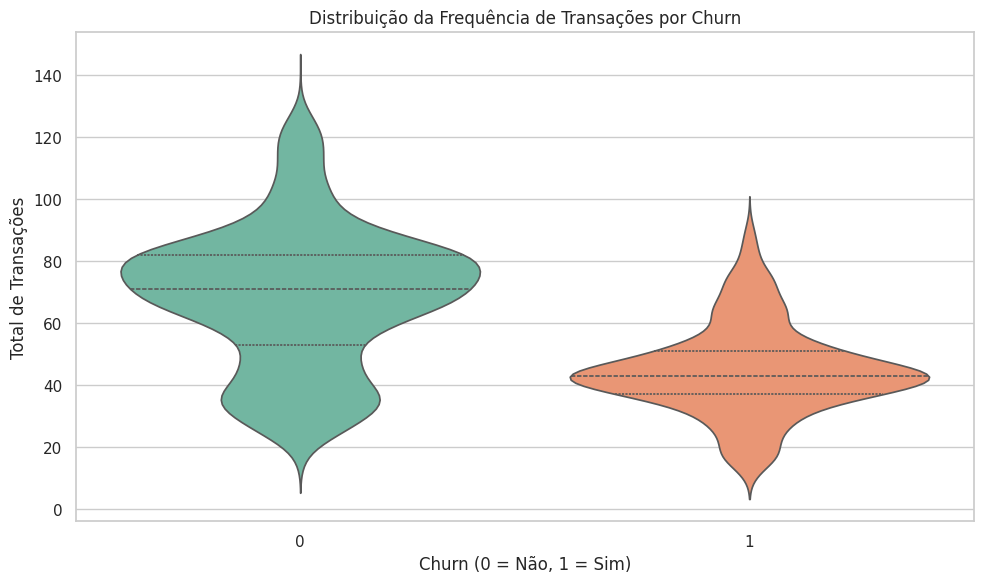

/tmp/ipython-input-3614568569.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y='total_ct_chng_q4_q1', palette='Set2')


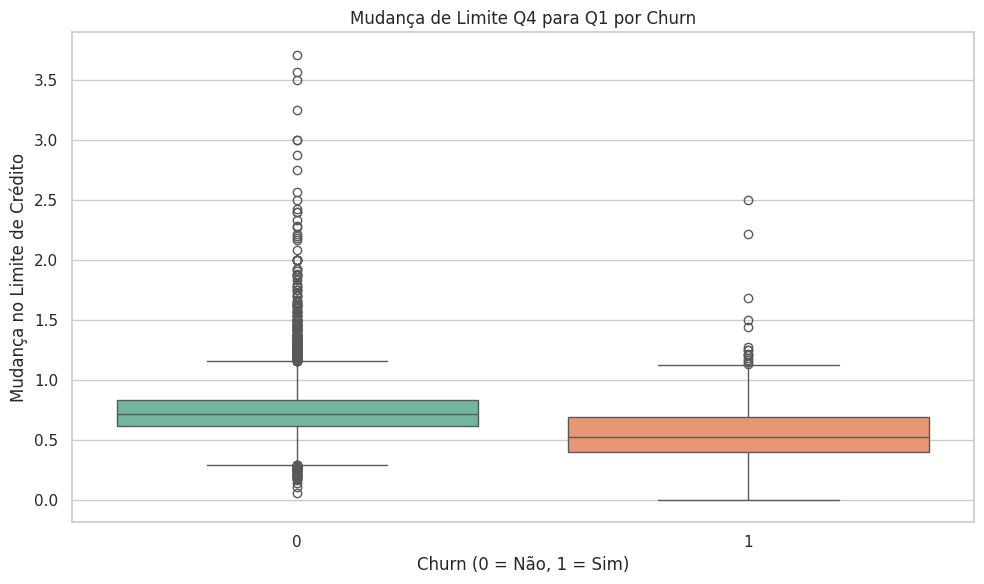

/tmp/ipython-input-3614568569.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='churn_flag', y='total_revolving_bal', palette='Set2', inner='quartile')


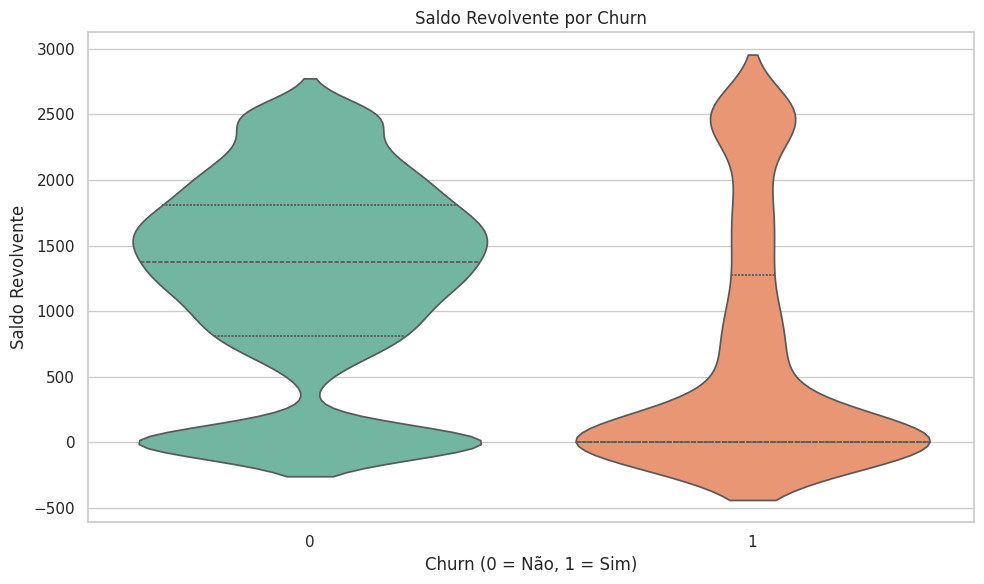

/tmp/ipython-input-3614568569.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='churn_flag', y='contacts_count_12_mon', palette='Set2')


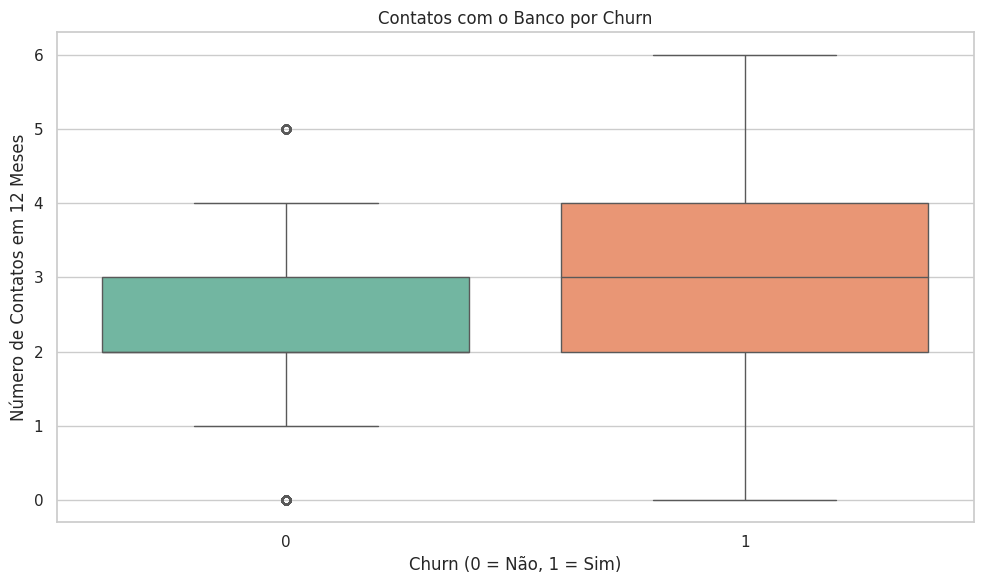

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

sns.boxplot(data=train, x='churn_flag', y='delta_uso', palette='Set2')
plt.title('Distribuição do delta_uso por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Delta de Uso do Cartão')
plt.tight_layout()
plt.show()

sns.violinplot(data=train, x='churn_flag', y='total_trans_ct', palette='Set2', inner="quartile")
plt.title('Distribuição da Frequência de Transações por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total de Transações')
plt.tight_layout()
plt.show()

sns.boxplot(data=train, x='churn_flag', y='total_ct_chng_q4_q1', palette='Set2')
plt.title('Mudança de Limite Q4 para Q1 por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Mudança no Limite de Crédito')
plt.tight_layout()
plt.show()

sns.violinplot(data=train, x='churn_flag', y='total_revolving_bal', palette='Set2', inner='quartile')
plt.title('Saldo Revolvente por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Saldo Revolvente')
plt.tight_layout()
plt.show()

sns.boxplot(data=train, x='churn_flag', y='contacts_count_12_mon', palette='Set2')
plt.title('Contatos com o Banco por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Contatos em 12 Meses')
plt.tight_layout()
plt.show()


# Seleção de features e pré-processamento de dados


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

df.head()

churn_flag  customer_age  gender  dependent_count education_level  \
0           0            45       0                3     High School   
1           0            49       1                5        Graduate   
2           0            51       0                3        Graduate   
3           0            40       1                4     High School   
4           0            40       0                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   total_relationship_count  ...  total_revolving_bal  avg_open_to_buy  \
0                         5  ...                  777          11914.0   
1                         6  ...                  864           7392.0   
2                         4  ...                    0           3418.0   
3                         3  ...                 2517            796.0   
4                         5  ...                    0           4716.0   

   total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   avg_utilization_ratio  utilizacao_relativa  engajamento  delta_uso  
0                  0.061             0.061224     0.076923     68.250  
1                  0.105             0.104651     0.045455    122.562  
2                  0.000             0.000000     0.000000     46.660  
3                  0.760             0.759734     0.029412     46.660  
4                  0.000             0.000000     0.000000     70.000  

[5 rows x 23 columns]

In [ ]:
one_hot_encoding_features = ['gender',
                             'education_level',
                             'marital_status',
                             'income_category',
                             'card_category']

In [ ]:
encoder = OneHotEncoder(drop=None, sparse_output=False)

encoded = encoder.fit_transform(df[one_hot_encoding_features])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(one_hot_encoding_features))

In [ ]:
encoder.get_feature_names_out(one_hot_encoding_features)

array(['gender_0', 'gender_1', 'education_level_College',
       'education_level_Doctorate', 'education_level_Graduate',
       'education_level_High School', 'education_level_Post-Graduate',
       'education_level_Uneducated', 'education_level_Unknown',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'income_category_$120K +', 'income_category_$40K - $60K',
       'income_category_$60K - $80K', 'income_category_$80K - $120K',
       'income_category_Less than $40K', 'income_category_Unknown',
       'card_category_Blue', 'card_category_Gold',
       'card_category_Platinum', 'card_category_Silver'], dtype=object)

In [ ]:
encoded_df.head()

gender_0  gender_1  education_level_College  education_level_Doctorate  \
0       1.0       0.0                      0.0                        0.0   
1       0.0       1.0                      0.0                        0.0   
2       1.0       0.0                      0.0                        0.0   
3       0.0       1.0                      0.0                        0.0   
4       1.0       0.0                      0.0                        0.0   

   education_level_Graduate  education_level_High School  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          1.0   
4                       0.0                          0.0   

   education_level_Post-Graduate  education_level_Uneducated  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         1.0   

   education_level_Unknown  marital_status_Divorced  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   income_category_$120K +  income_category_$40K - $60K  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   income_category_$60K - $80K  income_category_$80K - $120K  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           1.0   
3                          0.0                           0.0   
4                          1.0                           0.0   

   income_category_Less than $40K  income_category_Unknown  \
0                             0.0                      0.0   
1                             1.0                      0.0   
2                             0.0                      0.0   
3                             1.0                      0.0   
4                             0.0                      0.0   

   card_category_Blue  card_category_Gold  card_category_Platinum  \
0                 1.0                 0.0                     0.0   
1                 1.0                 0.0                     0.0   
2                 1.0                 0.0                     0.0   
3                 1.0                 0.0                     0.0   
4                 1.0                 0.0                     0.0   

   card_category_Silver  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 23 columns]

In [ ]:
df_encoded = pd.concat([df.drop(columns=one_hot_encoding_features), encoded_df], axis=1)

In [ ]:
df_encoded.head()

churn_flag  customer_age  dependent_count  months_on_book  \
0           0            45                3              39   
1           0            49                5              44   
2           0            51                3              36   
3           0            40                4              34   
4           0            40                3              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   income_category_$120K +  income_category_$40K - $60K  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   income_category_$60K - $80K  income_category_$80K - $120K  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           1.0   
3                          0.0                           0.0   
4                          1.0                           0.0   

   income_category_Less than $40K  income_category_Unknown  \
0                             0.0                      0.0   
1                             1.0                      0.0   
2                             0.0                      0.0   
3                             1.0                      0.0   
4                             0.0                      0.0   

   card_category_Blue  card_category_Gold  card_category_Platinum  \
0                 1.0                 0.0                     0.0   
1                 1.0                 0.0                     0.0   
2                 1.0                 0.0                     0.0   
3                 1.0                 0.0                     0.0   
4                 1.0                 0.0                     0.0   

   card_category_Silver  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 41 columns]

In [ ]:
std_scaling_features = [
    'customer_age',
    'dependent_count',
    'months_on_book',
    'total_relationship_count',
    'months_inactive_12_mon',
    'contacts_count_12_mon',
    'credit_limit',
    'total_revolving_bal',
    'avg_open_to_buy',
    'total_amt_chng_q4_q1',
    'total_trans_amt',
    'total_trans_ct',
    'total_ct_chng_q4_q1',
    'avg_utilization_ratio',
    'utilizacao_relativa',
    'engajamento',
    'delta_uso'
]


scaler = StandardScaler()

df_encoded[std_scaling_features] = scaler.fit_transform(df_encoded[std_scaling_features])

print(df_encoded[std_scaling_features].head())

   customer_age  dependent_count  months_on_book  total_relationship_count  \
0     -0.165406         0.503368        0.384621                  0.763943   
1      0.333570         2.043199        1.010715                  1.407306   
2      0.583058         0.503368        0.008965                  0.120579   
3     -0.789126         1.273283       -0.241473                 -0.522785   
4     -0.789126         0.503368       -1.869317                  0.763943   

   months_inactive_12_mon  contacts_count_12_mon  credit_limit  \
0               -1.327136               0.492404      0.446622   
1               -1.327136              -0.411616     -0.041367   
2               -1.327136              -2.219655     -0.573698   
3                1.641478              -1.315636     -0.585251   
4               -1.327136              -2.219655     -0.430877   

   total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0            -0.473422         0.488971              2.623494   
1   

In [ ]:
y = df_encoded['churn_flag']

X = df_encoded.drop('churn_flag', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2470   81]
 [ 225  263]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2551
           1       0.76      0.54      0.63       488

    accuracy                           0.90      3039
   macro avg       0.84      0.75      0.79      3039
weighted avg       0.89      0.90      0.89      3039



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier

y = df_encoded['churn_flag']
X = df_encoded.drop('churn_flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'is_unbalance': True,
    'verbose': -1
}

lgb_model = lgb.train(params, train_data, num_boost_round=200)

y_pred_proba = lgb_model.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[2483   68]
 [  47  441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2551
           1       0.87      0.90      0.88       488

    accuracy                           0.96      3039
   macro avg       0.92      0.94      0.93      3039
weighted avg       0.96      0.96      0.96      3039

AUC-ROC: 0.9922900694680967


# 1. Regressão Logística

`Accuracy`: 0.90

`Recall (churn = 1)`: 0.54 → apenas 54% dos churners foram detectados.

`Precision (churn = 1)`: 0.76 → 76% dos previstos como churn realmente churnaram.

`F1-score (churn = 1)`: 0.63


# Análise:
A regressão logística conseguiu boa acurácia geral (90%), mas teve dificuldade em capturar clientes churners (recall baixo). Isso acontece porque o dataset é desbalanceado (apenas 16% churn), e o modelo linear não conseguiu separar bem as classes.
O resultado é um modelo conservador, que acerta bem quem não vai churnar, mas perde muitos casos de churn.

# 2. LightGBM Ajustado

`Accuracy`: 0.96

`Recall (churn = 1)`: 0.90 → captura 90% dos churners.

`Precision (churn = 1)`: 0.87 → maioria dos previstos como churn realmente churnaram.

`F1-score (churn = 1)`: 0.88

`AUC-ROC`: 0.99 → praticamente perfeito.

# Análise:
O LightGBM superou muito a regressão logística:

Subiu recall de 0.54 → 0.90 → agora quase todos os churners são detectados.

Subiu f1-score de 0.63 → 0.88 → equilíbrio excelente entre precisão e recall.

AUC-ROC quase perfeito (0.99) mostra que o modelo separa muito bem clientes churners e não churners.


# Resumo da análise:
A regressão logística serviu como baseline, mas mostrou limitações para prever churners (recall baixo).
O ajuste com LightGBM trouxe um ganho expressivo em todas as métricas, principalmente em recall e AUC-ROC, transformando o modelo em uma ferramenta altamente confiável para previsão.

In [ ]:
!pip install shap


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


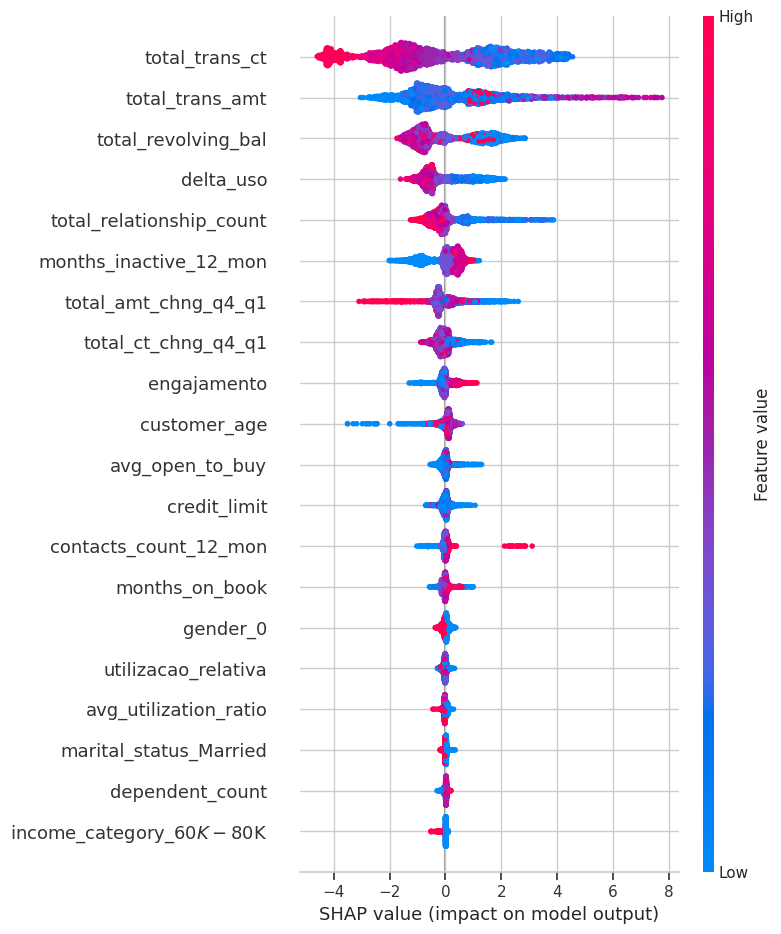

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(lgb_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

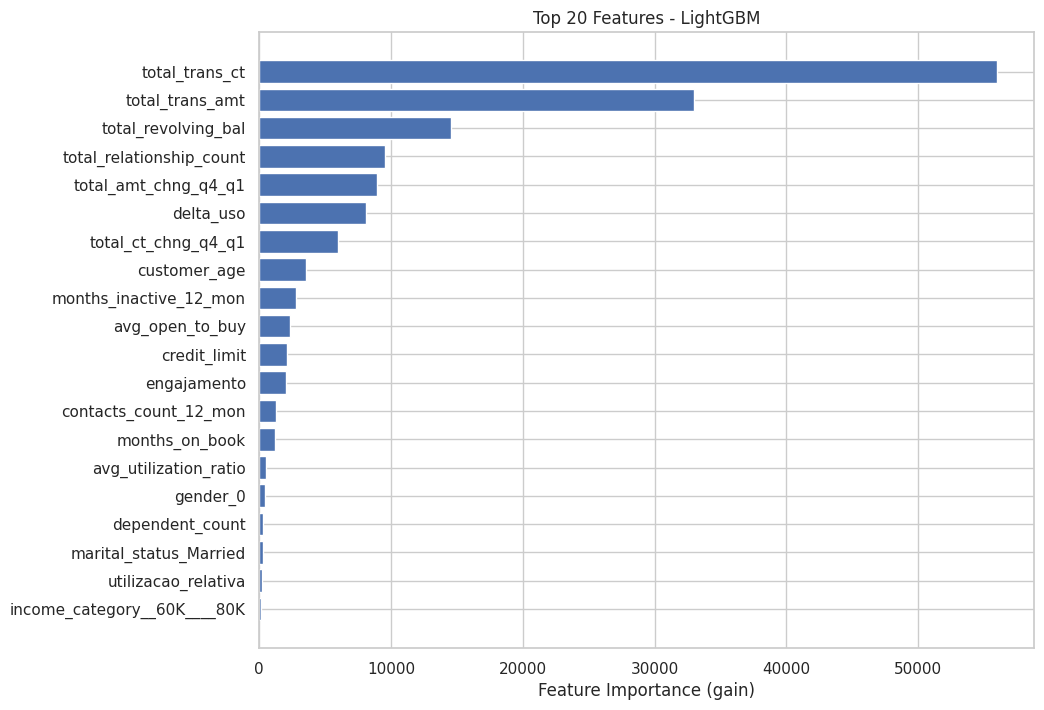

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importance = lgb_model.feature_importance(importance_type='gain')
feature_names = [c.replace('$','_').replace('-','_').replace(' ','_') for c in X_train.columns]

indices = np.argsort(importance)[-20:]

plt.figure(figsize=(10,8))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance (gain)')
plt.title('Top 20 Features - LightGBM')
plt.show()

# Análise dos Resultados do Modelo

## 1. Importância das variáveis (LightGBM – *gain*)

O gráfico mostra as **20 variáveis que mais contribuíram para o modelo**, segundo o ganho de informação:

- **Líder absoluto:**
  - `total_trans_ct` (número total de transações no ano) → disparado como a variável mais relevante.

- **Logo depois:**
  - `total_trans_amt` (valor total transacionado)  
  - `total_revolving_bal` (saldo rotativo)

- **Outras fortes:**
  - `total_relationship_count` (quantos produtos o cliente tem no banco)  
  - `total_amt_chng_q4_q1` e `total_ct_chng_q4_q1` (mudança no padrão de gasto/transações entre trimestres)  
  - `delta_uso` (variável derivada de comportamento)

- **Importâncias médias:**
  - Idade, meses inativos, limite de crédito, engajamento.

- **Importâncias menores:**
  - Variáveis demográficas (gênero, estado civil, dependentes, faixa de renda) tiveram pouco peso.

 **Análise:** O modelo foca quase totalmente no **comportamento transacional e de relacionamento**, e pouco nas características demográficas.

---

## 2. SHAP Values (impacto no output do modelo)

Esse gráfico mostra **como os valores altos/baixos de cada variável afetam a previsão de churn**:

- **`total_trans_ct` (número de transações):**
  - Valores baixos (azul) → puxam fortemente para **churn**.  
  - Valores altos (rosa) → puxam para **retenção**.  
  - ➝ Clientes que **transacionam pouco** têm alta chance de churn.

- **`total_trans_amt` (valor gasto):**
  - Mesmo padrão → **baixo gasto → churn**, **alto gasto → retenção**.

- **`total_revolving_bal` (saldo rotativo):**
  - Níveis intermediários puxam para churn.  
  - Extremos (muito baixo ou muito alto) têm menos impacto.

- **`delta_uso` e mudanças trimestrais (`amt_chng`, `ct_chng`):**
  - Redução forte no uso do cartão entre trimestres está associada a churn.

- **`total_relationship_count`:**
  - Mais produtos no banco → reduz churn.  
  - Poucos produtos → aumenta churn.

- **`months_inactive_12_mon`:**
  - Quanto mais meses inativo → maior risco de churn.

- **Variáveis demográficas (idade, gênero, estado civil, renda):**
  - Impacto bem menor no modelo comparado às variáveis de uso.

---

## Comparação dos dois gráficos

- O gráfico de **importância** mostra **quais variáveis o modelo usa mais**.  
- O gráfico de **SHAP** mostra **como cada variável influencia na direção do churn (aumentar ou reduzir)**.  

 Ambos confirmam o mesmo padrão:  
- **O comportamento transacional domina a previsão de churn.**  
- **Perfil demográfico quase não pesa.**

---

## Resumo

O modelo **LightGBM** descobriu que o **churn é explicado principalmente pela frequência e volume de transações, engajamento e relacionamento do cliente com o banco**.  

Características como idade, gênero ou renda importam pouco em comparação ao **comportamento de uso do cartão**.


# 💡 Insights e Recomendações de Negócio

## 1. Frequência de transações é o fator mais crítico  
**Insight:** Clientes que realizam poucas transações têm risco muito maior de churn.  

**Recomendação:**  
- Criar campanhas de incentivo ao uso, como cashback, pontos extras ou descontos para clientes de baixo volume de transações.  
- Monitorar em tempo real a queda na frequência de uso e acionar campanhas automáticas.  

---

## 2. Valor transacionado está diretamente ligado à retenção  
**Insight:** Clientes que gastam mais tendem a permanecer ativos; baixo gasto é um forte preditor de churn.  

**Recomendação:**  
- Oferecer aumentos graduais de limite de crédito para clientes engajados, estimulando maior gasto.  
- Promover ofertas personalizadas baseadas no histórico de consumo para aumentar o ticket médio.  

---

## 3. Redução no uso ao longo do tempo indica risco  
**Insight:** Queda significativa nas transações ou no valor gasto entre trimestres é um sinal antecipado de churn.  

**Recomendação:**  
- Implementar alertas de engajamento: quando o cliente apresenta redução brusca no uso, oferecer benefícios imediatos (e.g. promoções, ligações de retenção).  
- Criar modelos de monitoramento contínuo para prever churn antes que ocorra.  

---

## 4. Relacionamento com múltiplos produtos reduz churn  
**Insight:** Clientes com mais produtos no banco têm menor probabilidade de abandonar.  

**Recomendação:**  
- Incentivar *cross-sell* (ex.: oferecer empréstimos, seguros, investimentos).  
- Criar pacotes de fidelização multicanal, integrando cartão com outros serviços financeiros.  

---

## 5. Inatividade prolongada é um alerta vermelho  
**Insight:** Clientes com muitos meses inativos apresentam forte risco de churn.  

**Recomendação:**  
- Criar programas de reativação de clientes com benefícios para uso após períodos de inatividade.  
- Usar notificações personalizadas (app, e-mail, WhatsApp) lembrando vantagens de usar o cartão.  

---

## 6. Perfil demográfico tem baixo impacto  
**Insight:** Idade, gênero, estado civil e renda não explicam bem o churn, comparado ao comportamento de uso.  

**Recomendação:**  
- Estratégias de retenção devem se concentrar em dados transacionais e comportamentais, e não em segmentações demográficas tradicionais.  

---

#  Conclusão Estratégica  
O modelo mostra que o churn não é um problema de perfil de cliente, mas sim de **engajamento e relacionamento ativo com o banco**.  

Assim, a empresa deve investir em:  
- **Monitoramento em tempo real** de sinais de queda de engajamento.  
- **Ações proativas** de incentivo ao uso (cashback, pontos, limites, cross-sell).  
- **Automação** de campanhas de retenção personalizadas para clientes em risco.  


#  Relatório Financeiro Avançado — Projeto de Previsão de Churn  
**(Foco em impactos monetários)**

> **Objetivo:** apresentar apenas a avaliação financeira aprofundada do modelo (LightGBM) — ganhos, custos, sensibilidade e cenários — com base nas métricas obtidas (recall ≈ 90% / precision ≈ 87%).  
> Todas as contas usam as mesmas premissas-base (seção 1). Fórmulas no Apêndice.

---

## 1) Premissas base (valores usados nos cálculos)

- **Base analisada (N):** 10.127 clientes  
- **Taxa de churn histórica:** 16,07% → **P ≈ 1.627** clientes churners  
- **Receita média anual por cliente (ARPA):** **R\$ 3.000,00 / ano**  
- **Custo médio por ação de retenção (por cliente alvo):** **R\$ 100,00**  
- **Desempenho do modelo (teste):** `recall = 90%`, `precision = 87%`  
- **Eficácia média da ação de retenção (supondo):** `ret_eff = 50%` (parâmetro sensível)

---

## 2) Cálculo financeiro — cenário base (1 ano, N = 10.127)

**Resumo do fluxo de contagem:**

- Clientes que **iriam churnar (P):** ≈ **1.627**  
- Verdadeiros positivos (TP = recall × P): ≈ **1.464,67**  
- Falsos positivos (FP, deduzido pela precision): ≈ **218,86**  
- Total de alvos (T = TP + FP): ≈ **1.683,53**  
- Falsos negativos (FN): ≈ **162,74**

**Resultados financeiros (ret_eff = 50%):**

- **Clientes salvos:** TP × 50% ≈ **732,33**  
- **Receita preservada (ano 1):** 732,33 × R\$ 3.000 = **R\$ 2.197.002,02**  
- **Custo total de campanhas:** T × R\$ 100 = **R\$ 168.352,64**  
- **Lucro líquido (ano 1):** **R\$ 2.028.649,37**  
- **ROI (net / custo):** ≈ **12,05× (1.205%)**

**Métricas auxiliares**

- **Custo por cliente salvo (médio):** ≈ **R\$ 229,89**  
- **EV por cliente alvo (médio):** `precision × ret_eff × ARPA − cost_ret` = **R\$ 1.205,00**

**Custo dos erros**

- **Perda por FN (anual):** FN × ARPA ≈ **R\$ 488.222,67**  
- **Gastos com FPs:** FP × cost_ret ≈ **R\$ 21.885,84**

---

## 3) Sensibilidade — custo por ação × eficácia de retenção

| cost_ret | ret_eff | Clientes salvos | Receita preservada | Custo total | Lucro líquido | ROI |
|:--------:|:-------:|----------------:|-------------------:|------------:|--------------:|----:|
| R\$ 50   | 30%     | 439,40          | R\$ 1.318.201,21   | R\$ 84.176,32 | R\$ 1.234.024,89 | 14,66× |
| R\$ 50   | 50%     | 732,33          | R\$ 2.197.002,02   | R\$ 84.176,32 | R\$ 2.112.825,69 | 25,10× |
| R\$ 50   | 70%     | 1.025,27        | R\$ 3.075.802,82   | R\$ 84.176,32 | R\$ 2.991.626,50 | 35,54× |
| R\$100   | 30%     | 439,40          | R\$ 1.318.201,21   | R\$168.352,64 | R\$ 1.149.848,56 |  6,83× |
| R\$100   | 50%     | 732,33          | R\$ 2.197.002,02   | R\$168.352,64 | R\$ 2.028.649,37 | 12,05× |
| R\$100   | 70%     | 1.025,27        | R\$ 3.075.802,82   | R\$168.352,64 | R\$ 2.907.450,18 | 17,27× |
| R\$200   | 30%     | 439,40          | R\$ 1.318.201,21   | R\$336.705,29 | R\$   981.495,92 |  2,91× |
| R\$200   | 50%     | 732,33          | R\$ 2.197.002,02   | R\$336.705,29 | R\$ 1.860.296,73 |  5,52× |
| R\$200   | 70%     | 1.025,27        | R\$ 3.075.802,82   | R\$336.705,29 | R\$ 2.739.097,53 |  8,13× |

> Interpretação: mesmo com custo por ação elevado (R\$200) o projeto é viável se a eficácia for razoável. ROI cresce muito com ret_eff.

---

## 4) Sensibilidade ao recall (precision = 87%, cost_ret = R\$100, ret_eff = 50%)

| recall | TP (≈)   | Alvos (T) | Salvos | Receita preservada | Custo total | Net (lucro) |
|:------:|---------:|----------:|-------:|-------------------:|------------:|------------:|
| 70%    | 1.139,19 | 1.309,41  | 569,59 | R\$ 1.708.779,34   | R\$130.940,95 | R\$1.577.838,40 |
| 80%    | 1.301,93 | 1.496,47  | 650,96 | R\$ 1.952.890,68   | R\$149.646,80 | R\$1.803.243,88 |
| 90%    | 1.464,67 | 1.683,53  | 732,33 | R\$ 2.197.002,02   | R\$168.352,64 | R\$2.028.649,37 |
| 95%    | 1.546,04 | 1.777,06  | 773,02 | R\$ 2.319.057,68   | R\$177.705,57 | R\$2.141.352,11 |

> Nota: na prática aumentar recall reduz precision — o threshold ideal deve ser escolhido maximizando o lucro líquido (net), não só métricas classificatórias.

---

## 5) Break-even (retenção mínima para não ter prejuízo)

**Fórmula (em palavras):** retenção mínima = (1 / precision) × (cost_ret / ARPA)

Com ARPA = R\$ 3.000, precision = 0.87:

- cost_ret = R\$ 50 → **ret_eff_break ≈ 1,92%**  
- cost_ret = R\$100 → **ret_eff_break ≈ 3,83%**  
- cost_ret = R\$200 → **ret_eff_break ≈ 7,66%**

> Interpretação: devido ao ARPA elevado e precision alta, até eficiências de retenção muito baixas já tornam a ação positiva.

---

## 6) Modelo vs targeting aleatório (mesmo número de alvos T ≈ 1.683)

| Estratégia | Receita preservada | Custo total | Net (lucro) |
|:----------:|-------------------:|------------:|------------:|
| Modelo LGBM | R\$ 2.197.002,02 | R\$168.352,64 | **R\$ 2.028.649,37** |
| Aleatório   | R\$   405.814,05 | R\$168.352,64 | **R\$   237.461,41** |

> **Lift financeiro**: o modelo gera ≈ **8,5×** mais lucro líquido do que targeting aleatório.

---

## 7) Escalabilidade — exemplo para N = 200.000 clientes

Mantendo mesmas métricas (recall 90%, precision 87%, ret_eff 50%, cost_ret R\$100):

- **Clientes salvos:** ≈ 14.463  
- **Receita preservada (ano 1):** R\$ 43.389.000,00  
- **Custo campanhas:** R\$ 3.324.827,59  
- **Lucro líquido (ano 1):** R\$ 40.064.172,41

**NPV (exemplo):** se ganhos por cliente forem mantidos 3 anos e desconto 10% → PV por cliente ≈ R\$ 7.460,56  
- PV total ≈ 14.463 × 7.460,56 ≈ **R\$ 104.577.193,45**  
- NPV aproximado (subtrair custo inicial) ≈ **R\$ 101M**

---

## 8) Indicadores de controle (para dashboards financeiros)

- **EV por cliente alvo (médio):** R\$ 1.205  
- **Custo médio por cliente salvo:** R\$ 229,89  
- **Percentual de desperdício (FP):** ≈ 13% do custo total  
- **Perda anual por FN:** R\$ 488.222,67  
- **Elasticidade:** +1 p.p. em ret_eff → ≈ +R\$ 43.950/ano (antes de custo incremental)

---

## 9) Riscos e pontos financeiros a monitorar

- A eficácia das ações (ret_eff) é a variável mais sensível — use A/B tests.  
- ARPA pode mudar — reavalie frequentemente.  
- Trade-off recall × precision deve ser decidido por critérios financeiros (max net/NPV).  
- Custo operacional por escala (call center, logística) pode aumentar — renegociar custos por ação.  
- Monitorar churns pós-campanha (retenção temporária vs permanente).

---

## 10) Resumo executivo (números-chave)

- **Lucro líquido anual (base 10.127):** **R\$ 2.028.649,37**  
- **ROI (ano 1):** **12,05× (1.205%)**  
- **Custo por cliente salvo:** **R\$ 229,89**  
- **Lift vs aleatório:** **≈ 8,5×**  
- **NPV 3 anos (base 200k):** ≈ **R\$ 101M** (ordem de grandeza)

---

## 11) Apêndice — fórmulas usadas (para reproduzir / ajustar)

```text
P = N × p
TP = recall × P
FP = TP × (1/precision − 1)
T = TP + FP
salvos = TP × ret_eff
revenue_saved = salvos × ARPA
cost_total = T × cost_ret
net = revenue_saved − cost_total
ROI = net / cost_total
EV_por_alvo = precision × ret_eff × ARPA − cost_ret
ret_eff_break_even = (1 / precision) × (cost_ret / ARPA)
NPV_multi_ano = salvos × PV(ARPA, discount, years) − cost_total
